## **Tema escolhido**

**Tema 03:** elaboração de um sistema para decisão acerca de venda e compra de ações considerando uma carteira de 3 ações e um universo de possibildide de compra de 10 ações. 



# **Tema 03: índice Bovespa**

In [ ]:
!pip install yahooquery

     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 5.8MB 9.0MB/s 
     |████████████████████████████████| 911kB 42.0MB/s 
  Created wheel for yahooquery: filename=yahooquery-2.2.8-cp36-none-any.whl size=48254 sha256=6a255fa7f97ce85507b241bf913c4bfe0d2f4336d106bf046332208bc660ef33
  Stored in directory: /root/.cache/pip/wheels/00/61/bf/f6aff70ac4e3b5d73719be5f5f3ae4ce6edefce69187ed4926
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7013 sha256=7ffd8f1a31de9b45165f63ce116d786de75b8b8a7b22de868d4af308b9172e65
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built yahooquery requests-futures
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
from plotly.offline import iplot

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pprint import pprint
import seaborn as sns

from yahooquery import Ticker
from pandas_datareader import data, wb
import datetime

# sklearn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Diretório de imagens

import os
if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
from scipy.stats import multinomial
from typing import List

def markov_sequence(p_init: np.array, p_transition: np.array, sequence_length: int) -> List[int]:
    """
    Generate a Markov sequence based on p_init and p_transition.
    """
    if p_init is None:
        p_init = equilibrium_distribution(p_transition)
    initial_state = list(multinomial.rvs(1, p_init)).index(1)

    states = [initial_state]
    for _ in range(sequence_length - 1):
        p_tr = p_transition[states[-1]]
        new_state = list(multinomial.rvs(1, p_tr)).index(1)
        states.append(new_state)
    return states

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dados - IBOVESPA

In [ ]:
df_ibov = pd.read_csv('/content/drive/My Drive/Pós-Graduação/Machine Learning - Métodos Probabilísticos/BVSP.csv')
df_ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-06,47598.0,48092.0,47389.0,47735.0,47735.0,3370800.0
1,2015-10-07,47735.0,49290.0,47715.0,48914.0,48914.0,6060700.0
2,2015-10-08,48915.0,49247.0,48658.0,49107.0,49107.0,3585000.0
3,2015-10-09,49105.0,49752.0,48698.0,49338.0,49338.0,4551200.0
4,2015-10-13,49339.0,49339.0,47135.0,47363.0,47363.0,4221100.0


In [ ]:
df_ibov2 = df_ibov[df_ibov["Date"] > '2020-01-01']
df_ibov2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1054,2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700.0
1055,2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500.0
1056,2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000.0
1057,2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100.0
1058,2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500.0


## **Normalização**

In [ ]:
# Funções proprietárias

def OBS1(open,close):
    O1 = (close - open)/open
    return O1

def OBS2(open,high):
    O2 = (high - open)/open
    return O2

def OBS3(open,low):
    O3 = (open - low)/open
    return O3

# Explorando os dados

In [ ]:
Res_ibov = pd.DataFrame(OBS1(df_ibov2['Open'],df_ibov2['Close']), columns=['M1'])
 
Res_ibov['M2'] = OBS2(df_ibov2['Open'],df_ibov2['High'])
Res_ibov['M3'] = OBS3(df_ibov2['Open'],df_ibov2['Low'])
Res_ibov['delta'] = df_ibov2['Close'].diff()
Res_ibov =Res_ibov.dropna()
Res_ibov.head(10)

,M1,M2,M3,delta
1055,-0.007228,0.001923,0.010315,-866.0
1056,-0.007043,0.000000,0.012217,-829.0
1057,-0.001797,0.001745,0.007761,-216.0
1058,-0.003600,0.005726,0.008349,-415.0
1059,-0.002589,0.004921,0.007200,-300.0
1060,-0.003838,0.006874,0.008590,-444.0
1061,0.015774,0.015844,0.000000,1822.0
1062,0.002617,0.003239,0.006094,307.0
1063,-0.010354,0.000000,0.012276,-1218.0
1064,0.002482,0.005936,0.003900,290.0


# Simplificando os indicadores em três níveis

In [ ]:
tsh = 0.01
Res_ibovMod = Res_ibov 
H = Res_ibov['M1'] > tsh
L = Res_ibov['M1'] < -tsh
Mp = Res_ibov['M1'] < tsh 
Mn = Res_ibov['M1'] > -tsh
M = (Mp & Mn)

Res_ibovMod['M1'][H] = H.astype(int)
Res_ibovMod['M1'][L] = -L.astype(int)
Res_ibovMod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_ibov['M2'] > tsh
L = Res_ibov['M2'] < -tsh
Mp = Res_ibov['M2'] < tsh 
Mn = Res_ibov['M2'] > -tsh
M = (Mp & Mn)

Res_ibovMod['M2'][H] = H.astype(int)
Res_ibovMod['M2'][L] = -L.astype(int)
Res_ibovMod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_ibov['M3'] > tsh
L = Res_ibov['M3'] < -tsh
Mp = Res_ibov['M3'] < tsh 
Mn = Res_ibov['M3'] > -tsh
M = (Mp & Mn)

Res_ibovMod['M3'][H] = H.astype(int)
Res_ibovMod['M3'][L] = -L.astype(int)
Res_ibovMod['M3'][M] = M.astype(int) - M.astype(int)

# Analisando para o indice da bolsa
H = Res_ibov['delta'] > 0
L = Res_ibov['delta'] < 0

Res_ibovMod['delta'][H] = H.astype(int)
Res_ibovMod['delta'][L] = -L.astype(int)

Res_ibovMod.head(10)

,M1,M2,M3,delta
1055,0.0,0.0,1.0,-1.0
1056,0.0,0.0,1.0,-1.0
1057,0.0,0.0,0.0,-1.0
1058,0.0,0.0,0.0,-1.0
1059,0.0,0.0,0.0,-1.0
1060,0.0,0.0,0.0,-1.0
1061,1.0,1.0,0.0,1.0
1062,0.0,0.0,0.0,1.0
1063,-1.0,0.0,1.0,-1.0
1064,0.0,0.0,0.0,1.0


# Hipóteses

Após simplificar os indicadores em 3 níveis, foram criadas 27 hipóteses que variam da seguinte forma: M1, M2, M3 e delta podem receber os valores -1.0, 0.0 e 1.0. Através dessas hipóteses é possível verificar para determinadas combinações dos indíces M1, M2 e M3 como se comporta o delta, ou seja, se a bolsa subiu, desceu ou se manteve estável. Como o objetivo desse projeto é montar uma carteira com 3 ações em um universo de 10 ações, com base nos dados históricos poderemos determinar as ações que possuem mais casos de hipóteses de sucesso, ou seja, aquelas em que a bolsa tem maior probabilidade de subir.

In [ ]:
#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0

# A primeira linha possui a hipótese aplicada para os casos em que delta = 1 
dx_ibov = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 1.0)]

# A segunda linha possui a mesma hipótese, porém aplicada para os casos em que delta = -1 
dx_ibov1 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 1.0)]

# É feita a somatório tanto de delta = 1 e delta = -1 para identificar se para essa hipótese, há maior casos de subida ou de queda
df_ibov1 = dx_ibov.delta.sum()
df_ibov2 = dx_ibov1.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_ibov1)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_ibov2)

# Por fim, é feito o cálculo da quantidade (%) que o delta subiu ou desceu
Quant_ibov1 = df_ibov1/(df_ibov1+df_ibov2)
print("Chance de subir:",Quant_ibov1*100,"%")

# As demais hipóteses seguiram o mesmo modelo da hipótese 1. Nos casos em que a somatória for diferente de zero, será feito o cálculo de quantidade de vezes em que
# o delta subiu ou desceu

Hipótese 1 - Número de vezes que a bolsa subiu: 4.0
Hipótese 1 - Número de vezes que a bolsa desceu: -0.0
Chance de subir: 100.0 %


In [ ]:
#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_ibov2 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov3 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 1.0)]
df_ibov3 = dx_ibov2.delta.sum()
df_ibov4 = dx_ibov3.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_ibov3)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_ibov4)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_ibov4 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov5 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== -1.0)]
df_ibov5 = dx_ibov4.delta.sum()
df_ibov6 = dx_ibov5.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_ibov5)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_ibov6)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_ibov6 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov7 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== -1.0)]
df_ibov7 = dx_ibov6.delta.sum()
df_ibov8 = dx_ibov7.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_ibov7)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_ibov8)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_ibov8 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov9 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== -1.0)]
df_ibov9 = dx_ibov8.delta.sum()
df_ibov10 = dx_ibov9.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_ibov9)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_ibov10)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_ibov10 = Res_ibovMod.loc[(Res_ibovMod["delta"] == 1.0) & (Res_ibovMod["M1"]== -1.0) & (Res_ibovMod["M2"]== 1.0) & (Res_ibovMod["M3"]== 1.0)]
dx_ibov11 = Res_ibovMod.loc[(Res_ibovMod["delta"] == -1.0) & (Res_ibovMod["M1"]== -1.0) & (Res_ibovMod["M2"]== 1.0) & (Res_ibovMod["M3"]== 1.0)]
df_ibov11 = dx_ibov10.delta.sum()
df_ibov12 = dx_ibov11.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_ibov11)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_ibov12)
Quant_ibov2 = df_ibov12/(df_ibov11+df_ibov12)
print("Chance de descer:",Quant_ibov2*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_ibov12 = Res_ibovMod.loc[(Res_ibovMod["delta"] == 1.0) & (Res_ibovMod["M1"]== -1.0) & (Res_ibovMod["M2"]== -1.0) & (Res_ibovMod["M3"]== 1.0)]
dx_ibov13 = Res_ibovMod.loc[(Res_ibovMod["delta"] == -1.0) & (Res_ibovMod["M1"]== -1.0) & (Res_ibovMod["M2"]== -1.0) & (Res_ibovMod["M3"]== 1.0)]
df_ibov13 = dx_ibov12.delta.sum()
df_ibov14 = dx_ibov13.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_ibov13)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_ibov14)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_ibov15 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov16 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== -1.0)]
df_ibov16 = dx_ibov15.delta.sum()
df_ibov17 = dx_ibov16.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_ibov16)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_ibov17)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_ibov17 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov18 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 0.0)]
df_ibov18 = dx_ibov17.delta.sum()
df_ibov19 = dx_ibov18.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_ibov18)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_ibov19)
Quant_ibov3 = df_ibov18/(df_ibov18+df_ibov19)
print("Chance de subir:",Quant_ibov3*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_ibov19 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov20 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 0.0)]
df_ibov20 = dx_ibov19.delta.sum()
df_ibov21 = dx_ibov20.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_ibov20)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_ibov21)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_ibov20 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov21 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 1.0)]
df_ibov21 = dx_ibov20.delta.sum()
df_ibov22 = dx_ibov21.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_ibov21)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_ibov22)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_ibov22 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1==- 1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov23 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
df_ibov23 = dx_ibov22.delta.sum()
df_ibov24 = dx_ibov23.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_ibov23)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_ibov24)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_ibov24 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov25 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 0.0)]
df_ibov25 = dx_ibov24.delta.sum()
df_ibov26 = dx_ibov25.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_ibov25)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_ibov26)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_ibov26 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov27 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 0.0)]
df_ibov27 = dx_ibov26.delta.sum()
df_ibov28 = dx_ibov27.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_ibov27)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_ibov28)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_ibov28 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov29 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== -1.0)]
df_ibov29 = dx_ibov28.delta.sum()
df_ibov30 = dx_ibov29.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_ibov29)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_ibov30)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_ibov30 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov31 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
df_ibov31 = dx_ibov30.delta.sum()
df_ibov32 = dx_ibov31.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_ibov31)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_ibov32)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_ibov32 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov33 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 0.0)]
df_ibov33 = dx_ibov32.delta.sum()
df_ibov34 = dx_ibov33.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_ibov33)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_ibov34)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_ibov34 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov35 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 1.0)]
df_ibov35 = dx_ibov34.delta.sum()
df_ibov36 = dx_ibov35.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_ibov35)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_ibov36)
Quant_ibov4 = df_ibov36/(df_ibov35+df_ibov36)
print("Chance de descer:",Quant_ibov4*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_ibov36 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov37 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 1.0)]
df_ibov37 = dx_ibov36.delta.sum()
df_ibov38 = dx_ibov37.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_ibov37)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_ibov38)
Quant_ibov5 = df_ibov38/(df_ibov37+df_ibov38)
print("Chance de descer:",Quant_ibov5*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_ibov38 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov39 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== 0.0)]
df_ibov39 = dx_ibov38.delta.sum()
df_ibov40 = dx_ibov39.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_ibov39)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_ibov40)
Quant_ibov6 = df_ibov39/(df_ibov39+df_ibov40)
print("Chance de subir:",Quant_ibov6*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_ibov40 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 0.0)]
dx_ibov41 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 0.0)]
df_ibov41 = dx_ibov40.delta.sum()
df_ibov42 = dx_ibov41.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_ibov41)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_ibov42)
Quant_ibov7 = df_ibov42/(df_ibov41+df_ibov42)
print("Chance de descer:",Quant_ibov7*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_ibov42 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov43 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 1.0) & (Res_ibovMod.M3== -1.0)]
df_ibov43 = dx_ibov42.delta.sum()
df_ibov44 = dx_ibov43.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_ibov43)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_ibov44)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_ibov44 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov45 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 1.0)]
df_ibov45 = dx_ibov44.delta.sum()
df_ibov46 = dx_ibov45.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_ibov45)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_ibov46)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_ibov44 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov45 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== -1.0) & (Res_ibovMod.M3== 1.0)]
df_ibov45 = dx_ibov44.delta.sum()
df_ibov46 = dx_ibov45.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_ibov45)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_ibov46)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_ibov46 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov47 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
df_ibov47 = dx_ibov46.delta.sum()
df_ibov48 = dx_ibov47.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_ibov47)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_ibov48)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_ibov48 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
dx_ibov49 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== 0.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== -1.0)]
df_ibov49 = dx_ibov48.delta.sum()
df_ibov50 = dx_ibov49.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_ibov49)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_ibov50)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_ibov50 = Res_ibovMod.loc[(Res_ibovMod.delta == 1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 1.0)]
dx_ibov51 = Res_ibovMod.loc[(Res_ibovMod.delta == -1.0) & (Res_ibovMod.M1== -1.0) & (Res_ibovMod.M2== 0.0) & (Res_ibovMod.M3== 1.0)]
df_ibov51 = dx_ibov50.delta.sum()
df_ibov52 = dx_ibov51.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_ibov51)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_ibov52)
Quant_ibov8 = df_ibov52/(df_ibov51+df_ibov52)
print("Chance de descer:",Quant_ibov8*100,"%")


Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 0.0
Hipótese 6 - Número de vezes que a bolsa desceu: 11.0
Chance de descer: 100.0 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 58.0
Hipótese 9 - Número de vezes que a bolsa desceu: -0.0
Chance de subir: 100.0 %
Hipótese 10 - Número de vezes que a bolsa subiu: 0.0
Hipótese 10 - Número de vezes que a bolsa desceu: -0.

**Avaliando resultados:**
Podemos observar que apenas as hipóteses 1, 6, 9, 18, 19, 20, 21 e 27 apresentaram resultados de delta = 1 (subida) ou delta = -1 (queda)

              precision    recall  f1-score   support

        -1.0       0.90      0.85      0.88        33
         1.0       0.81      0.88      0.84        24

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



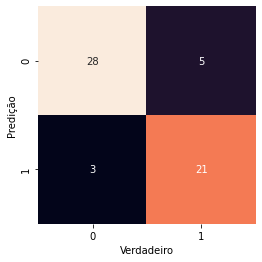

In [ ]:
# variável independente

y = np.array(Res_ibovMod['delta'])

# variáveis dependentes

X = Res_ibovMod[['M1','M2','M3']].to_numpy()

# Escolhendo o Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 50)

model = GaussianNB()
model.fit(X_train, y_train)

expected  = y_test
predicted = model.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(expected,predicted))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(predicted, expected)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição');

**Avaliando resultados:** o f1-score apresentou uma acuracia de 0.86, o que é considerado como um modelo confiavel visto sua alta precisão e baixo risco.

# Visualização

In [ ]:
ypc = np.cumsum(predicted)
yc  = np.cumsum(expected)

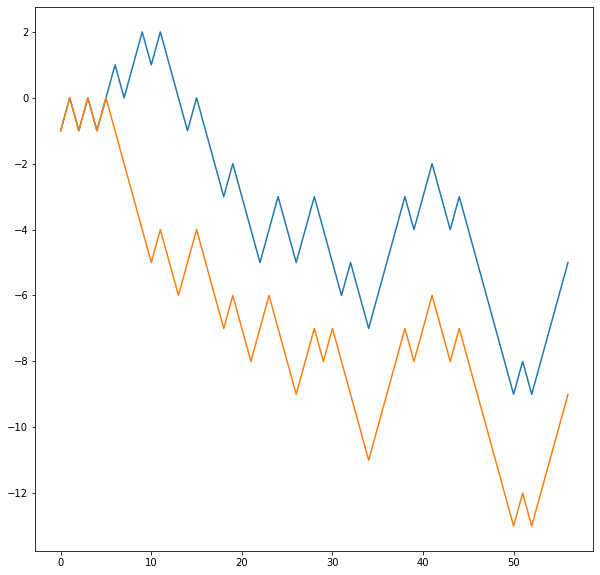

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(ypc)
plt.plot(yc)


plt.show()

**Avaliando resultados:** comparando gráficamente os eventos previstos com os eventos reais, é possivel verificar que os gráficos estão bem próximos o que valida o algoritmo de predição como sendo um bom algoritmo. 

# Dados - 10 ações escolhidas

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Pós-Graduação/Machine Learning - Métodos Probabilísticos/DadosBolsa2020.csv')

**Escolha das ações:** foram selecionadas 10 ações por serem ações que possuo em minha carteira pessoal ou que possuo interesse em adquirir

In [ ]:
df.sample(5)

,Data,Codigo,Descricao,Abertura,Maxima,Minima,Fechamento
1482,2020-08-05,ITSA4,ITAUSA,10.34,10.39,10.06,10.20
1679,2020-09-01,WEGE3,WEG,65.70,67.10,65.19,66.93
689,2020-04-09,WEGE3,WEG,40.54,41.40,38.19,38.30
1715,2020-09-08,MGLU3,MAGAZ LUIZA,87.05,89.51,85.50,87.69
130,2020-01-21,B3SA3,B3,44.85,45.65,44.57,44.70


In [ ]:
df_PETR4 = df[df["Codigo"] == 'PETR4']
df_MGLU3 = df[df["Codigo"] == 'MGLU3']
df_WEGE3 = df[df["Codigo"] == 'WEGE3']
df_LREN3 = df[df["Codigo"] == 'LREN3']
df_EQTL3 = df[df["Codigo"] == 'EQTL3']
df_B3SA3 = df[df["Codigo"] == 'B3SA3']
df_PSSA3 = df[df["Codigo"] == 'PSSA3']
df_ITSA4 = df[df["Codigo"] == 'ITSA4']
df_JBSS3 = df[df["Codigo"] == 'JBSS3']
df_RENT3 = df[df["Codigo"] == 'RENT3']

In [ ]:
df_PETR4.shape

(211, 7)

Foi usado o mesmo código para determinação de hipóteses aplicado ao data frame do IBOVESPA

# MGLU3

In [ ]:
# Explorando os dados

Res_MGLU3 = pd.DataFrame(OBS1(df_MGLU3['Abertura'],df_MGLU3['Fechamento']), columns=['M1'])
 
Res_MGLU3['M2'] = OBS2(df_MGLU3['Abertura'],df_MGLU3['Maxima'])
Res_MGLU3['M3'] = OBS3(df_MGLU3['Abertura'],df_MGLU3['Minima'])
Res_MGLU3['delta'] = df_MGLU3['Fechamento'].diff()
Res_MGLU3 =Res_MGLU3.dropna()
Res_MGLU3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_MGLU3Mod = Res_MGLU3 
H = Res_MGLU3['M1'] > tsh
L = Res_MGLU3['M1'] < -tsh
Mp = Res_MGLU3['M1'] < tsh 
Mn = Res_MGLU3['M1'] > -tsh
M = (Mp & Mn)

Res_MGLU3Mod['M1'][H] = H.astype(int)
Res_MGLU3Mod['M1'][L] = -L.astype(int)
Res_MGLU3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_MGLU3['M2'] > tsh
L = Res_MGLU3['M2'] < -tsh
Mp = Res_MGLU3['M2'] < tsh 
Mn = Res_MGLU3['M2'] > -tsh
M = (Mp & Mn)

Res_MGLU3Mod['M2'][H] = H.astype(int)
Res_MGLU3Mod['M2'][L] = -L.astype(int)
Res_MGLU3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_MGLU3['M3'] > tsh
L = Res_MGLU3['M3'] < -tsh
Mp = Res_MGLU3['M3'] < tsh 
Mn = Res_MGLU3['M3'] > -tsh
M = (Mp & Mn)

Res_MGLU3Mod['M3'][H] = H.astype(int)
Res_MGLU3Mod['M3'][L] = -L.astype(int)
Res_MGLU3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_MGLU3['delta'] > 0
L = Res_MGLU3['delta'] < 0

Res_MGLU3Mod['delta'][H] = H.astype(int)
Res_MGLU3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_MGLU3 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU31 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU31 = dx_MGLU3.delta.sum()
df_MGLU32 = dx_MGLU31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_MGLU31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_MGLU32)
Quant_MGLU31 = df_MGLU31/(df_MGLU31+df_MGLU32)
print("Chance de subir:",Quant_MGLU31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_MGLU32 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU33 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU33 = dx_MGLU32.delta.sum()
df_MGLU34 = dx_MGLU33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_MGLU33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_MGLU34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_MGLU34 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU35 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU35 = dx_MGLU34.delta.sum()
df_MGLU36 = dx_MGLU35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_MGLU35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_MGLU36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_MGLU36 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU37 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU37 = dx_MGLU36.delta.sum()
df_MGLU38 = dx_MGLU37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_MGLU37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_MGLU38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_MGLU38 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU39 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU39 = dx_MGLU38.delta.sum()
df_MGLU310 = dx_MGLU39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_MGLU39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_MGLU310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_MGLU310 = Res_MGLU3Mod.loc[(Res_MGLU3Mod["delta"] == 1.0) & (Res_MGLU3Mod["M1"]== -1.0) & (Res_MGLU3Mod["M2"]== 1.0) & (Res_MGLU3Mod["M3"]== 1.0)]
dx_MGLU311 = Res_MGLU3Mod.loc[(Res_MGLU3Mod["delta"] == -1.0) & (Res_MGLU3Mod["M1"]== -1.0) & (Res_MGLU3Mod["M2"]== 1.0) & (Res_MGLU3Mod["M3"]== 1.0)]
df_MGLU311 = dx_MGLU310.delta.sum()
df_MGLU312 = dx_MGLU311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_MGLU311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_MGLU312)
Quant_MGLU32 = df_MGLU312/(df_MGLU311+df_MGLU312)
print("Chance de descer:",Quant_MGLU32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_MGLU312 = Res_MGLU3Mod.loc[(Res_MGLU3Mod["delta"] == 1.0) & (Res_MGLU3Mod["M1"]== -1.0) & (Res_MGLU3Mod["M2"]== -1.0) & (Res_MGLU3Mod["M3"]== 1.0)]
dx_MGLU313 = Res_MGLU3Mod.loc[(Res_MGLU3Mod["delta"] == -1.0) & (Res_MGLU3Mod["M1"]== -1.0) & (Res_MGLU3Mod["M2"]== -1.0) & (Res_MGLU3Mod["M3"]== 1.0)]
df_MGLU313 = dx_MGLU312.delta.sum()
df_MGLU314 = dx_MGLU313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_MGLU313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_MGLU314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_MGLU315 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU316 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU316 = dx_MGLU315.delta.sum()
df_MGLU317 = dx_MGLU316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_MGLU316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_MGLU317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_MGLU317 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU318 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU318 = dx_MGLU317.delta.sum()
df_MGLU319 = dx_MGLU318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_MGLU318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_MGLU319)
Quant_MGLU33 = df_MGLU318/(df_MGLU318+df_MGLU319)
print("Chance de subir:",Quant_MGLU33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_MGLU319 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU320 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU320 = dx_MGLU319.delta.sum()
df_MGLU321 = dx_MGLU320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_MGLU320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_MGLU321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_MGLU320 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU321 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU321 = dx_MGLU320.delta.sum()
df_MGLU322 = dx_MGLU321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_MGLU321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_MGLU322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_MGLU322 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1==- 1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU323 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU323 = dx_MGLU322.delta.sum()
df_MGLU324 = dx_MGLU323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_MGLU323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_MGLU324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_MGLU324 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU325 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU325 = dx_MGLU324.delta.sum()
df_MGLU326 = dx_MGLU325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_MGLU325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_MGLU326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_MGLU326 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU327 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU327 = dx_MGLU326.delta.sum()
df_MGLU328 = dx_MGLU327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_MGLU327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_MGLU328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_MGLU328 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU329 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU329 = dx_MGLU328.delta.sum()
df_MGLU330 = dx_MGLU329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_MGLU329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_MGLU330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_MGLU330 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU331 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU331 = dx_MGLU330.delta.sum()
df_MGLU332 = dx_MGLU331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_MGLU331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_MGLU332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_MGLU332 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU333 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU333 = dx_MGLU332.delta.sum()
df_MGLU334 = dx_MGLU333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_MGLU333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_MGLU334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_MGLU334 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU335 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU335 = dx_MGLU334.delta.sum()
df_MGLU336 = dx_MGLU335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_MGLU335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_MGLU336)
Quant_MGLU34 = df_MGLU336/(df_MGLU335+df_MGLU336)
print("Chance de descer:",Quant_MGLU34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_MGLU336 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU337 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU337 = dx_MGLU336.delta.sum()
df_MGLU338 = dx_MGLU337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_MGLU337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_MGLU338)
Quant_MGLU35 = df_MGLU338/(df_MGLU337+df_MGLU338)
print("Chance de descer:",Quant_MGLU35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_MGLU338 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU339 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU339 = dx_MGLU338.delta.sum()
df_MGLU340 = dx_MGLU339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_MGLU339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_MGLU340)
Quant_MGLU36 = df_MGLU339/(df_MGLU339+df_MGLU340)
print("Chance de subir:",Quant_MGLU36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_MGLU340 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 0.0)]
dx_MGLU341 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 0.0)]
df_MGLU341 = dx_MGLU340.delta.sum()
df_MGLU342 = dx_MGLU341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_MGLU341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_MGLU342)
Quant_MGLU37 = df_MGLU342/(df_MGLU341+df_MGLU342)
print("Chance de descer:",Quant_MGLU37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_MGLU342 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU343 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 1.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU343 = dx_MGLU342.delta.sum()
df_MGLU344 = dx_MGLU343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_MGLU343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_MGLU344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_MGLU344 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU345 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU345 = dx_MGLU344.delta.sum()
df_MGLU346 = dx_MGLU345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_MGLU345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_MGLU346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_MGLU344 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU345 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== -1.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU345 = dx_MGLU344.delta.sum()
df_MGLU346 = dx_MGLU345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_MGLU345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_MGLU346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_MGLU346 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU347 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU347 = dx_MGLU346.delta.sum()
df_MGLU348 = dx_MGLU347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_MGLU347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_MGLU348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_MGLU348 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
dx_MGLU349 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== 0.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== -1.0)]
df_MGLU349 = dx_MGLU348.delta.sum()
df_MGLU350 = dx_MGLU349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_MGLU349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_MGLU350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_MGLU350 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == 1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 1.0)]
dx_MGLU351 = Res_MGLU3Mod.loc[(Res_MGLU3Mod.delta == -1.0) & (Res_MGLU3Mod.M1== -1.0) & (Res_MGLU3Mod.M2== 0.0) & (Res_MGLU3Mod.M3== 1.0)]
df_MGLU351 = dx_MGLU350.delta.sum()
df_MGLU352 = dx_MGLU351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_MGLU351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_MGLU352)
Quant_MGLU38 = df_MGLU352/(df_MGLU351+df_MGLU352)
print("Chance de descer:",Quant_MGLU38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 31.0
Hipótese 1 - Número de vezes que a bolsa desceu: 1.0
Chance de subir: 96.875 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 3.0
Hipótese 6 - Número de vezes que a bolsa desceu: 25.0
Chance de descer: 89.28571428571429 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 39.0
Hipótese 9 - Número de vezes que a bolsa 

# WEGE3

In [ ]:
# Explorando os dados

Res_WEGE3 = pd.DataFrame(OBS1(df_WEGE3['Abertura'],df_WEGE3['Fechamento']), columns=['M1'])
 
Res_WEGE3['M2'] = OBS2(df_WEGE3['Abertura'],df_WEGE3['Maxima'])
Res_WEGE3['M3'] = OBS3(df_WEGE3['Abertura'],df_WEGE3['Minima'])
Res_WEGE3['delta'] = df_WEGE3['Fechamento'].diff()
Res_WEGE3 =Res_WEGE3.dropna()
Res_WEGE3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_WEGE3Mod = Res_WEGE3 
H = Res_WEGE3['M1'] > tsh
L = Res_WEGE3['M1'] < -tsh
Mp = Res_WEGE3['M1'] < tsh 
Mn = Res_WEGE3['M1'] > -tsh
M = (Mp & Mn)

Res_WEGE3Mod['M1'][H] = H.astype(int)
Res_WEGE3Mod['M1'][L] = -L.astype(int)
Res_WEGE3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_WEGE3['M2'] > tsh
L = Res_WEGE3['M2'] < -tsh
Mp = Res_WEGE3['M2'] < tsh 
Mn = Res_WEGE3['M2'] > -tsh
M = (Mp & Mn)

Res_WEGE3Mod['M2'][H] = H.astype(int)
Res_WEGE3Mod['M2'][L] = -L.astype(int)
Res_WEGE3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_WEGE3['M3'] > tsh
L = Res_WEGE3['M3'] < -tsh
Mp = Res_WEGE3['M3'] < tsh 
Mn = Res_WEGE3['M3'] > -tsh
M = (Mp & Mn)

Res_WEGE3Mod['M3'][H] = H.astype(int)
Res_WEGE3Mod['M3'][L] = -L.astype(int)
Res_WEGE3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_WEGE3['delta'] > 0
L = Res_WEGE3['delta'] < 0

Res_WEGE3Mod['delta'][H] = H.astype(int)
Res_WEGE3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_WEGE3 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE31 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE31 = dx_WEGE3.delta.sum()
df_WEGE32 = dx_WEGE31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_WEGE31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_WEGE32)
Quant_WEGE31 = df_WEGE31/(df_WEGE31+df_WEGE32)
print("Chance de subir:",Quant_WEGE31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_WEGE32 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE33 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE33 = dx_WEGE32.delta.sum()
df_WEGE34 = dx_WEGE33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_WEGE33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_WEGE34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_WEGE34 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE35 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE35 = dx_WEGE34.delta.sum()
df_WEGE36 = dx_WEGE35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_WEGE35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_WEGE36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_WEGE36 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE37 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE37 = dx_WEGE36.delta.sum()
df_WEGE38 = dx_WEGE37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_WEGE37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_WEGE38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_WEGE38 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE39 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE39 = dx_WEGE38.delta.sum()
df_WEGE310 = dx_WEGE39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_WEGE39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_WEGE310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_WEGE310 = Res_WEGE3Mod.loc[(Res_WEGE3Mod["delta"] == 1.0) & (Res_WEGE3Mod["M1"]== -1.0) & (Res_WEGE3Mod["M2"]== 1.0) & (Res_WEGE3Mod["M3"]== 1.0)]
dx_WEGE311 = Res_WEGE3Mod.loc[(Res_WEGE3Mod["delta"] == -1.0) & (Res_WEGE3Mod["M1"]== -1.0) & (Res_WEGE3Mod["M2"]== 1.0) & (Res_WEGE3Mod["M3"]== 1.0)]
df_WEGE311 = dx_WEGE310.delta.sum()
df_WEGE312 = dx_WEGE311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_WEGE311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_WEGE312)
Quant_WEGE32 = df_WEGE312/(df_WEGE311+df_WEGE312)
print("Chance de descer:",Quant_WEGE32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_WEGE312 = Res_WEGE3Mod.loc[(Res_WEGE3Mod["delta"] == 1.0) & (Res_WEGE3Mod["M1"]== -1.0) & (Res_WEGE3Mod["M2"]== -1.0) & (Res_WEGE3Mod["M3"]== 1.0)]
dx_WEGE313 = Res_WEGE3Mod.loc[(Res_WEGE3Mod["delta"] == -1.0) & (Res_WEGE3Mod["M1"]== -1.0) & (Res_WEGE3Mod["M2"]== -1.0) & (Res_WEGE3Mod["M3"]== 1.0)]
df_WEGE313 = dx_WEGE312.delta.sum()
df_WEGE314 = dx_WEGE313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_WEGE313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_WEGE314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_WEGE315 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE316 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE316 = dx_WEGE315.delta.sum()
df_WEGE317 = dx_WEGE316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_WEGE316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_WEGE317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_WEGE317 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE318 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE318 = dx_WEGE317.delta.sum()
df_WEGE319 = dx_WEGE318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_WEGE318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_WEGE319)
Quant_WEGE33 = df_WEGE318/(df_WEGE318+df_WEGE319)
print("Chance de subir:",Quant_WEGE33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_WEGE319 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE320 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE320 = dx_WEGE319.delta.sum()
df_WEGE321 = dx_WEGE320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_WEGE320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_WEGE321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_WEGE320 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE321 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE321 = dx_WEGE320.delta.sum()
df_WEGE322 = dx_WEGE321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_WEGE321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_WEGE322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_WEGE322 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1==- 1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE323 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE323 = dx_WEGE322.delta.sum()
df_WEGE324 = dx_WEGE323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_WEGE323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_WEGE324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_WEGE324 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE325 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE325 = dx_WEGE324.delta.sum()
df_WEGE326 = dx_WEGE325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_WEGE325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_WEGE326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_WEGE326 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE327 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE327 = dx_WEGE326.delta.sum()
df_WEGE328 = dx_WEGE327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_WEGE327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_WEGE328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_WEGE328 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE329 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE329 = dx_WEGE328.delta.sum()
df_WEGE330 = dx_WEGE329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_WEGE329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_WEGE330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_WEGE330 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE331 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE331 = dx_WEGE330.delta.sum()
df_WEGE332 = dx_WEGE331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_WEGE331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_WEGE332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_WEGE332 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE333 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE333 = dx_WEGE332.delta.sum()
df_WEGE334 = dx_WEGE333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_WEGE333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_WEGE334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_WEGE334 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE335 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE335 = dx_WEGE334.delta.sum()
df_WEGE336 = dx_WEGE335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_WEGE335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_WEGE336)
Quant_WEGE34 = df_WEGE336/(df_WEGE335+df_WEGE336)
print("Chance de descer:",Quant_WEGE34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_WEGE336 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE337 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE337 = dx_WEGE336.delta.sum()
df_WEGE338 = dx_WEGE337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_WEGE337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_WEGE338)
Quant_WEGE35 = df_WEGE338/(df_WEGE337+df_WEGE338)
print("Chance de descer:",Quant_WEGE35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_WEGE338 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE339 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE339 = dx_WEGE338.delta.sum()
df_WEGE340 = dx_WEGE339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_WEGE339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_WEGE340)
Quant_WEGE36 = df_WEGE339/(df_WEGE339+df_WEGE340)
print("Chance de subir:",Quant_WEGE36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_WEGE340 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 0.0)]
dx_WEGE341 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 0.0)]
df_WEGE341 = dx_WEGE340.delta.sum()
df_WEGE342 = dx_WEGE341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_WEGE341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_WEGE342)
Quant_WEGE37 = df_WEGE342/(df_WEGE341+df_WEGE342)
print("Chance de descer:",Quant_WEGE37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_WEGE342 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE343 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 1.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE343 = dx_WEGE342.delta.sum()
df_WEGE344 = dx_WEGE343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_WEGE343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_WEGE344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_WEGE344 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE345 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE345 = dx_WEGE344.delta.sum()
df_WEGE346 = dx_WEGE345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_WEGE345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_WEGE346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_WEGE344 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE345 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== -1.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE345 = dx_WEGE344.delta.sum()
df_WEGE346 = dx_WEGE345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_WEGE345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_WEGE346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_WEGE346 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE347 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE347 = dx_WEGE346.delta.sum()
df_WEGE348 = dx_WEGE347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_WEGE347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_WEGE348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_WEGE348 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
dx_WEGE349 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== 0.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== -1.0)]
df_WEGE349 = dx_WEGE348.delta.sum()
df_WEGE350 = dx_WEGE349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_WEGE349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_WEGE350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_WEGE350 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == 1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 1.0)]
dx_WEGE351 = Res_WEGE3Mod.loc[(Res_WEGE3Mod.delta == -1.0) & (Res_WEGE3Mod.M1== -1.0) & (Res_WEGE3Mod.M2== 0.0) & (Res_WEGE3Mod.M3== 1.0)]
df_WEGE351 = dx_WEGE350.delta.sum()
df_WEGE352 = dx_WEGE351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_WEGE351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_WEGE352)
Quant_WEGE38 = df_WEGE352/(df_WEGE351+df_WEGE352)
print("Chance de descer:",Quant_WEGE38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 22.0
Hipótese 1 - Número de vezes que a bolsa desceu: 3.0
Chance de subir: 88.0 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 3.0
Hipótese 6 - Número de vezes que a bolsa desceu: 24.0
Chance de descer: 88.88888888888889 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 51.0
Hipótese 9 - Número de vezes que a bolsa de

# LREN3

In [ ]:
# Explorando os dados

Res_LREN3 = pd.DataFrame(OBS1(df_LREN3['Abertura'],df_LREN3['Fechamento']), columns=['M1'])
 
Res_LREN3['M2'] = OBS2(df_LREN3['Abertura'],df_LREN3['Maxima'])
Res_LREN3['M3'] = OBS3(df_LREN3['Abertura'],df_LREN3['Minima'])
Res_LREN3['delta'] = df_LREN3['Fechamento'].diff()
Res_LREN3 =Res_LREN3.dropna()
Res_LREN3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_LREN3Mod = Res_LREN3 
H = Res_LREN3['M1'] > tsh
L = Res_LREN3['M1'] < -tsh
Mp = Res_LREN3['M1'] < tsh 
Mn = Res_LREN3['M1'] > -tsh
M = (Mp & Mn)

Res_LREN3Mod['M1'][H] = H.astype(int)
Res_LREN3Mod['M1'][L] = -L.astype(int)
Res_LREN3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_LREN3['M2'] > tsh
L = Res_LREN3['M2'] < -tsh
Mp = Res_LREN3['M2'] < tsh 
Mn = Res_LREN3['M2'] > -tsh
M = (Mp & Mn)

Res_LREN3Mod['M2'][H] = H.astype(int)
Res_LREN3Mod['M2'][L] = -L.astype(int)
Res_LREN3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_LREN3['M3'] > tsh
L = Res_LREN3['M3'] < -tsh
Mp = Res_LREN3['M3'] < tsh 
Mn = Res_LREN3['M3'] > -tsh
M = (Mp & Mn)

Res_LREN3Mod['M3'][H] = H.astype(int)
Res_LREN3Mod['M3'][L] = -L.astype(int)
Res_LREN3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_LREN3['delta'] > 0
L = Res_LREN3['delta'] < 0

Res_LREN3Mod['delta'][H] = H.astype(int)
Res_LREN3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_LREN3 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN31 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN31 = dx_LREN3.delta.sum()
df_LREN32 = dx_LREN31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_LREN31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_LREN32)
Quant_LREN31 = df_LREN31/(df_LREN31+df_LREN32)
print("Chance de subir:",Quant_LREN31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_LREN32 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN33 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN33 = dx_LREN32.delta.sum()
df_LREN34 = dx_LREN33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_LREN33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_LREN34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_LREN34 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN35 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN35 = dx_LREN34.delta.sum()
df_LREN36 = dx_LREN35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_LREN35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_LREN36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_LREN36 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN37 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN37 = dx_LREN36.delta.sum()
df_LREN38 = dx_LREN37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_LREN37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_LREN38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_LREN38 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN39 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN39 = dx_LREN38.delta.sum()
df_LREN310 = dx_LREN39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_LREN39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_LREN310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_LREN310 = Res_LREN3Mod.loc[(Res_LREN3Mod["delta"] == 1.0) & (Res_LREN3Mod["M1"]== -1.0) & (Res_LREN3Mod["M2"]== 1.0) & (Res_LREN3Mod["M3"]== 1.0)]
dx_LREN311 = Res_LREN3Mod.loc[(Res_LREN3Mod["delta"] == -1.0) & (Res_LREN3Mod["M1"]== -1.0) & (Res_LREN3Mod["M2"]== 1.0) & (Res_LREN3Mod["M3"]== 1.0)]
df_LREN311 = dx_LREN310.delta.sum()
df_LREN312 = dx_LREN311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_LREN311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_LREN312)
Quant_LREN32 = df_LREN312/(df_LREN311+df_LREN312)
print("Chance de descer:",Quant_LREN32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_LREN312 = Res_LREN3Mod.loc[(Res_LREN3Mod["delta"] == 1.0) & (Res_LREN3Mod["M1"]== -1.0) & (Res_LREN3Mod["M2"]== -1.0) & (Res_LREN3Mod["M3"]== 1.0)]
dx_LREN313 = Res_LREN3Mod.loc[(Res_LREN3Mod["delta"] == -1.0) & (Res_LREN3Mod["M1"]== -1.0) & (Res_LREN3Mod["M2"]== -1.0) & (Res_LREN3Mod["M3"]== 1.0)]
df_LREN313 = dx_LREN312.delta.sum()
df_LREN314 = dx_LREN313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_LREN313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_LREN314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_LREN315 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN316 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN316 = dx_LREN315.delta.sum()
df_LREN317 = dx_LREN316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_LREN316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_LREN317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_LREN317 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN318 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN318 = dx_LREN317.delta.sum()
df_LREN319 = dx_LREN318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_LREN318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_LREN319)
Quant_LREN33 = df_LREN318/(df_LREN318+df_LREN319)
print("Chance de subir:",Quant_LREN33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_LREN319 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN320 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN320 = dx_LREN319.delta.sum()
df_LREN321 = dx_LREN320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_LREN320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_LREN321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_LREN320 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN321 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN321 = dx_LREN320.delta.sum()
df_LREN322 = dx_LREN321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_LREN321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_LREN322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_LREN322 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1==- 1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN323 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN323 = dx_LREN322.delta.sum()
df_LREN324 = dx_LREN323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_LREN323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_LREN324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_LREN324 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN325 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN325 = dx_LREN324.delta.sum()
df_LREN326 = dx_LREN325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_LREN325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_LREN326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_LREN326 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN327 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN327 = dx_LREN326.delta.sum()
df_LREN328 = dx_LREN327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_LREN327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_LREN328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_LREN328 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN329 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN329 = dx_LREN328.delta.sum()
df_LREN330 = dx_LREN329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_LREN329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_LREN330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_LREN330 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN331 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN331 = dx_LREN330.delta.sum()
df_LREN332 = dx_LREN331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_LREN331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_LREN332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_LREN332 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN333 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN333 = dx_LREN332.delta.sum()
df_LREN334 = dx_LREN333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_LREN333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_LREN334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_LREN334 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN335 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN335 = dx_LREN334.delta.sum()
df_LREN336 = dx_LREN335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_LREN335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_LREN336)
Quant_LREN34 = df_LREN336/(df_LREN335+df_LREN336)
print("Chance de descer:",Quant_LREN34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_LREN336 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN337 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN337 = dx_LREN336.delta.sum()
df_LREN338 = dx_LREN337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_LREN337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_LREN338)
Quant_LREN35 = df_LREN338/(df_LREN337+df_LREN338)
print("Chance de descer:",Quant_LREN35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_LREN338 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN339 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN339 = dx_LREN338.delta.sum()
df_LREN340 = dx_LREN339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_LREN339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_LREN340)
Quant_LREN36 = df_LREN339/(df_LREN339+df_LREN340)
print("Chance de subir:",Quant_LREN36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_LREN340 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 0.0)]
dx_LREN341 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 0.0)]
df_LREN341 = dx_LREN340.delta.sum()
df_LREN342 = dx_LREN341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_LREN341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_LREN342)
Quant_LREN37 = df_LREN342/(df_LREN341+df_LREN342)
print("Chance de descer:",Quant_LREN37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_LREN342 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN343 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 1.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN343 = dx_LREN342.delta.sum()
df_LREN344 = dx_LREN343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_LREN343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_LREN344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_LREN344 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN345 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN345 = dx_LREN344.delta.sum()
df_LREN346 = dx_LREN345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_LREN345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_LREN346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_LREN344 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN345 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== -1.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN345 = dx_LREN344.delta.sum()
df_LREN346 = dx_LREN345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_LREN345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_LREN346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_LREN346 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN347 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN347 = dx_LREN346.delta.sum()
df_LREN348 = dx_LREN347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_LREN347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_LREN348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_LREN348 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
dx_LREN349 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== 0.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== -1.0)]
df_LREN349 = dx_LREN348.delta.sum()
df_LREN350 = dx_LREN349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_LREN349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_LREN350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_LREN350 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == 1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 1.0)]
dx_LREN351 = Res_LREN3Mod.loc[(Res_LREN3Mod.delta == -1.0) & (Res_LREN3Mod.M1== -1.0) & (Res_LREN3Mod.M2== 0.0) & (Res_LREN3Mod.M3== 1.0)]
df_LREN351 = dx_LREN350.delta.sum()
df_LREN352 = dx_LREN351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_LREN351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_LREN352)
Quant_LREN38 = df_LREN352/(df_LREN351+df_LREN352)
print("Chance de descer:",Quant_LREN38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 21.0
Hipótese 1 - Número de vezes que a bolsa desceu: 5.0
Chance de subir: 80.76923076923077 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 7.0
Hipótese 6 - Número de vezes que a bolsa desceu: 31.0
Chance de descer: 81.57894736842105 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 37.0
Hipótese 9 - Número de vezes q

# EQTL3

In [ ]:
# Explorando os dados

Res_EQTL3 = pd.DataFrame(OBS1(df_EQTL3['Abertura'],df_EQTL3['Fechamento']), columns=['M1'])
 
Res_EQTL3['M2'] = OBS2(df_EQTL3['Abertura'],df_EQTL3['Maxima'])
Res_EQTL3['M3'] = OBS3(df_EQTL3['Abertura'],df_EQTL3['Minima'])
Res_EQTL3['delta'] = df_EQTL3['Fechamento'].diff()
Res_EQTL3 =Res_EQTL3.dropna()
Res_EQTL3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_EQTL3Mod = Res_EQTL3 
H = Res_EQTL3['M1'] > tsh
L = Res_EQTL3['M1'] < -tsh
Mp = Res_EQTL3['M1'] < tsh 
Mn = Res_EQTL3['M1'] > -tsh
M = (Mp & Mn)

Res_EQTL3Mod['M1'][H] = H.astype(int)
Res_EQTL3Mod['M1'][L] = -L.astype(int)
Res_EQTL3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_EQTL3['M2'] > tsh
L = Res_EQTL3['M2'] < -tsh
Mp = Res_EQTL3['M2'] < tsh 
Mn = Res_EQTL3['M2'] > -tsh
M = (Mp & Mn)

Res_EQTL3Mod['M2'][H] = H.astype(int)
Res_EQTL3Mod['M2'][L] = -L.astype(int)
Res_EQTL3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_EQTL3['M3'] > tsh
L = Res_EQTL3['M3'] < -tsh
Mp = Res_EQTL3['M3'] < tsh 
Mn = Res_EQTL3['M3'] > -tsh
M = (Mp & Mn)

Res_EQTL3Mod['M3'][H] = H.astype(int)
Res_EQTL3Mod['M3'][L] = -L.astype(int)
Res_EQTL3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_EQTL3['delta'] > 0
L = Res_EQTL3['delta'] < 0

Res_EQTL3Mod['delta'][H] = H.astype(int)
Res_EQTL3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_EQTL3 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL31 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL31 = dx_EQTL3.delta.sum()
df_EQTL32 = dx_EQTL31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_EQTL31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_EQTL32)
Quant_EQTL31 = df_EQTL31/(df_EQTL31+df_EQTL32)
print("Chance de subir:",Quant_EQTL31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_EQTL32 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL33 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL33 = dx_EQTL32.delta.sum()
df_EQTL34 = dx_EQTL33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_EQTL33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_EQTL34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_EQTL34 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL35 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL35 = dx_EQTL34.delta.sum()
df_EQTL36 = dx_EQTL35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_EQTL35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_EQTL36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_EQTL36 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL37 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL37 = dx_EQTL36.delta.sum()
df_EQTL38 = dx_EQTL37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_EQTL37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_EQTL38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_EQTL38 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL39 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL39 = dx_EQTL38.delta.sum()
df_EQTL310 = dx_EQTL39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_EQTL39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_EQTL310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_EQTL310 = Res_EQTL3Mod.loc[(Res_EQTL3Mod["delta"] == 1.0) & (Res_EQTL3Mod["M1"]== -1.0) & (Res_EQTL3Mod["M2"]== 1.0) & (Res_EQTL3Mod["M3"]== 1.0)]
dx_EQTL311 = Res_EQTL3Mod.loc[(Res_EQTL3Mod["delta"] == -1.0) & (Res_EQTL3Mod["M1"]== -1.0) & (Res_EQTL3Mod["M2"]== 1.0) & (Res_EQTL3Mod["M3"]== 1.0)]
df_EQTL311 = dx_EQTL310.delta.sum()
df_EQTL312 = dx_EQTL311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_EQTL311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_EQTL312)
Quant_EQTL32 = df_EQTL312/(df_EQTL311+df_EQTL312)
print("Chance de descer:",Quant_EQTL32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_EQTL312 = Res_EQTL3Mod.loc[(Res_EQTL3Mod["delta"] == 1.0) & (Res_EQTL3Mod["M1"]== -1.0) & (Res_EQTL3Mod["M2"]== -1.0) & (Res_EQTL3Mod["M3"]== 1.0)]
dx_EQTL313 = Res_EQTL3Mod.loc[(Res_EQTL3Mod["delta"] == -1.0) & (Res_EQTL3Mod["M1"]== -1.0) & (Res_EQTL3Mod["M2"]== -1.0) & (Res_EQTL3Mod["M3"]== 1.0)]
df_EQTL313 = dx_EQTL312.delta.sum()
df_EQTL314 = dx_EQTL313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_EQTL313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_EQTL314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_EQTL315 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL316 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL316 = dx_EQTL315.delta.sum()
df_EQTL317 = dx_EQTL316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_EQTL316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_EQTL317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_EQTL317 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL318 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL318 = dx_EQTL317.delta.sum()
df_EQTL319 = dx_EQTL318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_EQTL318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_EQTL319)
Quant_EQTL33 = df_EQTL318/(df_EQTL318+df_EQTL319)
print("Chance de subir:",Quant_EQTL33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_EQTL319 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL320 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL320 = dx_EQTL319.delta.sum()
df_EQTL321 = dx_EQTL320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_EQTL320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_EQTL321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_EQTL320 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL321 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL321 = dx_EQTL320.delta.sum()
df_EQTL322 = dx_EQTL321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_EQTL321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_EQTL322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_EQTL322 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1==- 1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL323 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL323 = dx_EQTL322.delta.sum()
df_EQTL324 = dx_EQTL323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_EQTL323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_EQTL324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_EQTL324 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL325 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL325 = dx_EQTL324.delta.sum()
df_EQTL326 = dx_EQTL325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_EQTL325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_EQTL326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_EQTL326 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL327 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL327 = dx_EQTL326.delta.sum()
df_EQTL328 = dx_EQTL327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_EQTL327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_EQTL328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_EQTL328 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL329 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL329 = dx_EQTL328.delta.sum()
df_EQTL330 = dx_EQTL329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_EQTL329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_EQTL330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_EQTL330 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL331 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL331 = dx_EQTL330.delta.sum()
df_EQTL332 = dx_EQTL331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_EQTL331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_EQTL332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_EQTL332 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL333 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL333 = dx_EQTL332.delta.sum()
df_EQTL334 = dx_EQTL333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_EQTL333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_EQTL334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_EQTL334 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL335 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL335 = dx_EQTL334.delta.sum()
df_EQTL336 = dx_EQTL335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_EQTL335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_EQTL336)
Quant_EQTL34 = df_EQTL336/(df_EQTL335+df_EQTL336)
print("Chance de descer:",Quant_EQTL34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_EQTL336 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL337 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL337 = dx_EQTL336.delta.sum()
df_EQTL338 = dx_EQTL337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_EQTL337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_EQTL338)
Quant_EQTL35 = df_EQTL338/(df_EQTL337+df_EQTL338)
print("Chance de descer:",Quant_EQTL35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_EQTL338 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL339 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL339 = dx_EQTL338.delta.sum()
df_EQTL340 = dx_EQTL339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_EQTL339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_EQTL340)
Quant_EQTL36 = df_EQTL339/(df_EQTL339+df_EQTL340)
print("Chance de subir:",Quant_EQTL36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_EQTL340 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 0.0)]
dx_EQTL341 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 0.0)]
df_EQTL341 = dx_EQTL340.delta.sum()
df_EQTL342 = dx_EQTL341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_EQTL341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_EQTL342)
Quant_EQTL37 = df_EQTL342/(df_EQTL341+df_EQTL342)
print("Chance de descer:",Quant_EQTL37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_EQTL342 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL343 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 1.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL343 = dx_EQTL342.delta.sum()
df_EQTL344 = dx_EQTL343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_EQTL343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_EQTL344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_EQTL344 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL345 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL345 = dx_EQTL344.delta.sum()
df_EQTL346 = dx_EQTL345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_EQTL345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_EQTL346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_EQTL344 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL345 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== -1.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL345 = dx_EQTL344.delta.sum()
df_EQTL346 = dx_EQTL345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_EQTL345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_EQTL346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_EQTL346 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL347 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL347 = dx_EQTL346.delta.sum()
df_EQTL348 = dx_EQTL347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_EQTL347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_EQTL348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_EQTL348 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
dx_EQTL349 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== 0.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== -1.0)]
df_EQTL349 = dx_EQTL348.delta.sum()
df_EQTL350 = dx_EQTL349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_EQTL349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_EQTL350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_EQTL350 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == 1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 1.0)]
dx_EQTL351 = Res_EQTL3Mod.loc[(Res_EQTL3Mod.delta == -1.0) & (Res_EQTL3Mod.M1== -1.0) & (Res_EQTL3Mod.M2== 0.0) & (Res_EQTL3Mod.M3== 1.0)]
df_EQTL351 = dx_EQTL350.delta.sum()
df_EQTL352 = dx_EQTL351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_EQTL351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_EQTL352)
Quant_EQTL38 = df_EQTL352/(df_EQTL351+df_EQTL352)
print("Chance de descer:",Quant_EQTL38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 20.0
Hipótese 1 - Número de vezes que a bolsa desceu: 6.0
Chance de subir: 76.92307692307693 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 2.0
Hipótese 6 - Número de vezes que a bolsa desceu: 15.0
Chance de descer: 88.23529411764706 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 45.0
Hipótese 9 - Número de vezes q

# B3SA3

In [ ]:
# Explorando os dados

Res_B3SA3 = pd.DataFrame(OBS1(df_B3SA3['Abertura'],df_B3SA3['Fechamento']), columns=['M1'])
 
Res_B3SA3['M2'] = OBS2(df_B3SA3['Abertura'],df_B3SA3['Maxima'])
Res_B3SA3['M3'] = OBS3(df_B3SA3['Abertura'],df_B3SA3['Minima'])
Res_B3SA3['delta'] = df_B3SA3['Fechamento'].diff()
Res_B3SA3 =Res_B3SA3.dropna()
Res_B3SA3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_B3SA3Mod = Res_B3SA3 
H = Res_B3SA3['M1'] > tsh
L = Res_B3SA3['M1'] < -tsh
Mp = Res_B3SA3['M1'] < tsh 
Mn = Res_B3SA3['M1'] > -tsh
M = (Mp & Mn)

Res_B3SA3Mod['M1'][H] = H.astype(int)
Res_B3SA3Mod['M1'][L] = -L.astype(int)
Res_B3SA3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_B3SA3['M2'] > tsh
L = Res_B3SA3['M2'] < -tsh
Mp = Res_B3SA3['M2'] < tsh 
Mn = Res_B3SA3['M2'] > -tsh
M = (Mp & Mn)

Res_B3SA3Mod['M2'][H] = H.astype(int)
Res_B3SA3Mod['M2'][L] = -L.astype(int)
Res_B3SA3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_B3SA3['M3'] > tsh
L = Res_B3SA3['M3'] < -tsh
Mp = Res_B3SA3['M3'] < tsh 
Mn = Res_B3SA3['M3'] > -tsh
M = (Mp & Mn)

Res_B3SA3Mod['M3'][H] = H.astype(int)
Res_B3SA3Mod['M3'][L] = -L.astype(int)
Res_B3SA3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_B3SA3['delta'] > 0
L = Res_B3SA3['delta'] < 0

Res_B3SA3Mod['delta'][H] = H.astype(int)
Res_B3SA3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_B3SA3 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA31 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA31 = dx_B3SA3.delta.sum()
df_B3SA32 = dx_B3SA31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_B3SA31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_B3SA32)
Quant_B3SA31 = df_B3SA31/(df_B3SA31+df_B3SA32)
print("Chance de subir:",Quant_B3SA31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_B3SA32 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA33 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA33 = dx_B3SA32.delta.sum()
df_B3SA34 = dx_B3SA33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_B3SA33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_B3SA34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_B3SA34 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA35 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA35 = dx_B3SA34.delta.sum()
df_B3SA36 = dx_B3SA35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_B3SA35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_B3SA36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_B3SA36 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA37 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA37 = dx_B3SA36.delta.sum()
df_B3SA38 = dx_B3SA37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_B3SA37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_B3SA38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_B3SA38 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA39 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA39 = dx_B3SA38.delta.sum()
df_B3SA310 = dx_B3SA39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_B3SA39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_B3SA310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_B3SA310 = Res_B3SA3Mod.loc[(Res_B3SA3Mod["delta"] == 1.0) & (Res_B3SA3Mod["M1"]== -1.0) & (Res_B3SA3Mod["M2"]== 1.0) & (Res_B3SA3Mod["M3"]== 1.0)]
dx_B3SA311 = Res_B3SA3Mod.loc[(Res_B3SA3Mod["delta"] == -1.0) & (Res_B3SA3Mod["M1"]== -1.0) & (Res_B3SA3Mod["M2"]== 1.0) & (Res_B3SA3Mod["M3"]== 1.0)]
df_B3SA311 = dx_B3SA310.delta.sum()
df_B3SA312 = dx_B3SA311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_B3SA311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_B3SA312)
Quant_B3SA32 = df_B3SA312/(df_B3SA311+df_B3SA312)
print("Chance de descer:",Quant_B3SA32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_B3SA312 = Res_B3SA3Mod.loc[(Res_B3SA3Mod["delta"] == 1.0) & (Res_B3SA3Mod["M1"]== -1.0) & (Res_B3SA3Mod["M2"]== -1.0) & (Res_B3SA3Mod["M3"]== 1.0)]
dx_B3SA313 = Res_B3SA3Mod.loc[(Res_B3SA3Mod["delta"] == -1.0) & (Res_B3SA3Mod["M1"]== -1.0) & (Res_B3SA3Mod["M2"]== -1.0) & (Res_B3SA3Mod["M3"]== 1.0)]
df_B3SA313 = dx_B3SA312.delta.sum()
df_B3SA314 = dx_B3SA313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_B3SA313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_B3SA314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_B3SA315 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA316 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA316 = dx_B3SA315.delta.sum()
df_B3SA317 = dx_B3SA316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_B3SA316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_B3SA317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_B3SA317 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA318 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA318 = dx_B3SA317.delta.sum()
df_B3SA319 = dx_B3SA318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_B3SA318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_B3SA319)
Quant_B3SA33 = df_B3SA318/(df_B3SA318+df_B3SA319)
print("Chance de subir:",Quant_B3SA33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_B3SA319 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA320 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA320 = dx_B3SA319.delta.sum()
df_B3SA321 = dx_B3SA320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_B3SA320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_B3SA321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_B3SA320 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA321 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA321 = dx_B3SA320.delta.sum()
df_B3SA322 = dx_B3SA321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_B3SA321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_B3SA322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_B3SA322 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1==- 1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA323 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA323 = dx_B3SA322.delta.sum()
df_B3SA324 = dx_B3SA323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_B3SA323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_B3SA324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_B3SA324 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA325 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA325 = dx_B3SA324.delta.sum()
df_B3SA326 = dx_B3SA325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_B3SA325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_B3SA326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_B3SA326 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA327 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA327 = dx_B3SA326.delta.sum()
df_B3SA328 = dx_B3SA327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_B3SA327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_B3SA328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_B3SA328 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA329 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA329 = dx_B3SA328.delta.sum()
df_B3SA330 = dx_B3SA329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_B3SA329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_B3SA330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_B3SA330 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA331 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA331 = dx_B3SA330.delta.sum()
df_B3SA332 = dx_B3SA331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_B3SA331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_B3SA332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_B3SA332 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA333 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA333 = dx_B3SA332.delta.sum()
df_B3SA334 = dx_B3SA333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_B3SA333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_B3SA334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_B3SA334 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA335 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA335 = dx_B3SA334.delta.sum()
df_B3SA336 = dx_B3SA335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_B3SA335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_B3SA336)
Quant_B3SA34 = df_B3SA336/(df_B3SA335+df_B3SA336)
print("Chance de descer:",Quant_B3SA34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_B3SA336 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA337 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA337 = dx_B3SA336.delta.sum()
df_B3SA338 = dx_B3SA337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_B3SA337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_B3SA338)
Quant_B3SA35 = df_B3SA338/(df_B3SA337+df_B3SA338)
print("Chance de descer:",Quant_B3SA35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_B3SA338 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA339 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA339 = dx_B3SA338.delta.sum()
df_B3SA340 = dx_B3SA339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_B3SA339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_B3SA340)
Quant_B3SA36 = df_B3SA339/(df_B3SA339+df_B3SA340)
print("Chance de subir:",Quant_B3SA36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_B3SA340 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 0.0)]
dx_B3SA341 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 0.0)]
df_B3SA341 = dx_B3SA340.delta.sum()
df_B3SA342 = dx_B3SA341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_B3SA341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_B3SA342)
Quant_B3SA37 = df_B3SA342/(df_B3SA341+df_B3SA342)
print("Chance de descer:",Quant_B3SA37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_B3SA342 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA343 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 1.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA343 = dx_B3SA342.delta.sum()
df_B3SA344 = dx_B3SA343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_B3SA343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_B3SA344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_B3SA344 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA345 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA345 = dx_B3SA344.delta.sum()
df_B3SA346 = dx_B3SA345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_B3SA345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_B3SA346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_B3SA344 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA345 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== -1.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA345 = dx_B3SA344.delta.sum()
df_B3SA346 = dx_B3SA345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_B3SA345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_B3SA346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_B3SA346 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA347 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA347 = dx_B3SA346.delta.sum()
df_B3SA348 = dx_B3SA347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_B3SA347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_B3SA348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_B3SA348 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
dx_B3SA349 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== 0.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== -1.0)]
df_B3SA349 = dx_B3SA348.delta.sum()
df_B3SA350 = dx_B3SA349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_B3SA349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_B3SA350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_B3SA350 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == 1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 1.0)]
dx_B3SA351 = Res_B3SA3Mod.loc[(Res_B3SA3Mod.delta == -1.0) & (Res_B3SA3Mod.M1== -1.0) & (Res_B3SA3Mod.M2== 0.0) & (Res_B3SA3Mod.M3== 1.0)]
df_B3SA351 = dx_B3SA350.delta.sum()
df_B3SA352 = dx_B3SA351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_B3SA351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_B3SA352)
Quant_B3SA38 = df_B3SA352/(df_B3SA351+df_B3SA352)
print("Chance de descer:",Quant_B3SA38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 11.0
Hipótese 1 - Número de vezes que a bolsa desceu: 6.0
Chance de subir: 64.70588235294117 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 5.0
Hipótese 6 - Número de vezes que a bolsa desceu: 17.0
Chance de descer: 77.27272727272727 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 51.0
Hipótese 9 - Número de vezes q

# PSSA3

In [ ]:
# Explorando os dados

Res_PSSA3 = pd.DataFrame(OBS1(df_PSSA3['Abertura'],df_PSSA3['Fechamento']), columns=['M1'])
 
Res_PSSA3['M2'] = OBS2(df_PSSA3['Abertura'],df_PSSA3['Maxima'])
Res_PSSA3['M3'] = OBS3(df_PSSA3['Abertura'],df_PSSA3['Minima'])
Res_PSSA3['delta'] = df_PSSA3['Fechamento'].diff()
Res_PSSA3 =Res_PSSA3.dropna()
Res_PSSA3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_PSSA3Mod = Res_PSSA3 
H = Res_PSSA3['M1'] > tsh
L = Res_PSSA3['M1'] < -tsh
Mp = Res_PSSA3['M1'] < tsh 
Mn = Res_PSSA3['M1'] > -tsh
M = (Mp & Mn)

Res_PSSA3Mod['M1'][H] = H.astype(int)
Res_PSSA3Mod['M1'][L] = -L.astype(int)
Res_PSSA3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_PSSA3['M2'] > tsh
L = Res_PSSA3['M2'] < -tsh
Mp = Res_PSSA3['M2'] < tsh 
Mn = Res_PSSA3['M2'] > -tsh
M = (Mp & Mn)

Res_PSSA3Mod['M2'][H] = H.astype(int)
Res_PSSA3Mod['M2'][L] = -L.astype(int)
Res_PSSA3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_PSSA3['M3'] > tsh
L = Res_PSSA3['M3'] < -tsh
Mp = Res_PSSA3['M3'] < tsh 
Mn = Res_PSSA3['M3'] > -tsh
M = (Mp & Mn)

Res_PSSA3Mod['M3'][H] = H.astype(int)
Res_PSSA3Mod['M3'][L] = -L.astype(int)
Res_PSSA3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_PSSA3['delta'] > 0
L = Res_PSSA3['delta'] < 0

Res_PSSA3Mod['delta'][H] = H.astype(int)
Res_PSSA3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_PSSA3 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA31 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA31 = dx_PSSA3.delta.sum()
df_PSSA32 = dx_PSSA31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_PSSA31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_PSSA32)
Quant_PSSA31 = df_PSSA31/(df_PSSA31+df_PSSA32)
print("Chance de subir:",Quant_PSSA31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_PSSA32 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA33 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA33 = dx_PSSA32.delta.sum()
df_PSSA34 = dx_PSSA33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_PSSA33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_PSSA34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_PSSA34 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA35 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA35 = dx_PSSA34.delta.sum()
df_PSSA36 = dx_PSSA35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_PSSA35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_PSSA36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_PSSA36 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA37 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA37 = dx_PSSA36.delta.sum()
df_PSSA38 = dx_PSSA37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_PSSA37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_PSSA38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_PSSA38 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA39 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA39 = dx_PSSA38.delta.sum()
df_PSSA310 = dx_PSSA39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_PSSA39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_PSSA310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_PSSA310 = Res_PSSA3Mod.loc[(Res_PSSA3Mod["delta"] == 1.0) & (Res_PSSA3Mod["M1"]== -1.0) & (Res_PSSA3Mod["M2"]== 1.0) & (Res_PSSA3Mod["M3"]== 1.0)]
dx_PSSA311 = Res_PSSA3Mod.loc[(Res_PSSA3Mod["delta"] == -1.0) & (Res_PSSA3Mod["M1"]== -1.0) & (Res_PSSA3Mod["M2"]== 1.0) & (Res_PSSA3Mod["M3"]== 1.0)]
df_PSSA311 = dx_PSSA310.delta.sum()
df_PSSA312 = dx_PSSA311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_PSSA311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_PSSA312)
Quant_PSSA32 = df_PSSA312/(df_PSSA311+df_PSSA312)
print("Chance de descer:",Quant_PSSA32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_PSSA312 = Res_PSSA3Mod.loc[(Res_PSSA3Mod["delta"] == 1.0) & (Res_PSSA3Mod["M1"]== -1.0) & (Res_PSSA3Mod["M2"]== -1.0) & (Res_PSSA3Mod["M3"]== 1.0)]
dx_PSSA313 = Res_PSSA3Mod.loc[(Res_PSSA3Mod["delta"] == -1.0) & (Res_PSSA3Mod["M1"]== -1.0) & (Res_PSSA3Mod["M2"]== -1.0) & (Res_PSSA3Mod["M3"]== 1.0)]
df_PSSA313 = dx_PSSA312.delta.sum()
df_PSSA314 = dx_PSSA313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_PSSA313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_PSSA314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_PSSA315 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA316 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA316 = dx_PSSA315.delta.sum()
df_PSSA317 = dx_PSSA316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_PSSA316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_PSSA317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_PSSA317 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA318 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA318 = dx_PSSA317.delta.sum()
df_PSSA319 = dx_PSSA318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_PSSA318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_PSSA319)
Quant_PSSA33 = df_PSSA318/(df_PSSA318+df_PSSA319)
print("Chance de subir:",Quant_PSSA33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_PSSA319 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA320 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA320 = dx_PSSA319.delta.sum()
df_PSSA321 = dx_PSSA320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_PSSA320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_PSSA321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_PSSA320 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA321 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA321 = dx_PSSA320.delta.sum()
df_PSSA322 = dx_PSSA321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_PSSA321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_PSSA322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_PSSA322 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1==- 1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA323 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA323 = dx_PSSA322.delta.sum()
df_PSSA324 = dx_PSSA323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_PSSA323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_PSSA324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_PSSA324 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA325 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA325 = dx_PSSA324.delta.sum()
df_PSSA326 = dx_PSSA325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_PSSA325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_PSSA326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_PSSA326 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA327 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA327 = dx_PSSA326.delta.sum()
df_PSSA328 = dx_PSSA327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_PSSA327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_PSSA328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_PSSA328 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA329 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA329 = dx_PSSA328.delta.sum()
df_PSSA330 = dx_PSSA329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_PSSA329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_PSSA330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_PSSA330 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA331 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA331 = dx_PSSA330.delta.sum()
df_PSSA332 = dx_PSSA331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_PSSA331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_PSSA332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_PSSA332 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA333 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA333 = dx_PSSA332.delta.sum()
df_PSSA334 = dx_PSSA333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_PSSA333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_PSSA334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_PSSA334 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA335 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA335 = dx_PSSA334.delta.sum()
df_PSSA336 = dx_PSSA335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_PSSA335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_PSSA336)
Quant_PSSA34 = df_PSSA336/(df_PSSA335+df_PSSA336)
print("Chance de descer:",Quant_PSSA34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_PSSA336 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA337 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA337 = dx_PSSA336.delta.sum()
df_PSSA338 = dx_PSSA337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_PSSA337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_PSSA338)
Quant_PSSA35 = df_PSSA338/(df_PSSA337+df_PSSA338)
print("Chance de descer:",Quant_PSSA35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_PSSA338 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA339 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA339 = dx_PSSA338.delta.sum()
df_PSSA340 = dx_PSSA339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_PSSA339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_PSSA340)
Quant_PSSA36 = df_PSSA339/(df_PSSA339+df_PSSA340)
print("Chance de subir:",Quant_PSSA36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_PSSA340 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 0.0)]
dx_PSSA341 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 0.0)]
df_PSSA341 = dx_PSSA340.delta.sum()
df_PSSA342 = dx_PSSA341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_PSSA341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_PSSA342)
Quant_PSSA37 = df_PSSA342/(df_PSSA341+df_PSSA342)
print("Chance de descer:",Quant_PSSA37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_PSSA342 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA343 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 1.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA343 = dx_PSSA342.delta.sum()
df_PSSA344 = dx_PSSA343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_PSSA343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_PSSA344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_PSSA344 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA345 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA345 = dx_PSSA344.delta.sum()
df_PSSA346 = dx_PSSA345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_PSSA345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_PSSA346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_PSSA344 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA345 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== -1.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA345 = dx_PSSA344.delta.sum()
df_PSSA346 = dx_PSSA345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_PSSA345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_PSSA346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_PSSA346 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA347 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA347 = dx_PSSA346.delta.sum()
df_PSSA348 = dx_PSSA347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_PSSA347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_PSSA348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_PSSA348 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
dx_PSSA349 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== 0.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== -1.0)]
df_PSSA349 = dx_PSSA348.delta.sum()
df_PSSA350 = dx_PSSA349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_PSSA349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_PSSA350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_PSSA350 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == 1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 1.0)]
dx_PSSA351 = Res_PSSA3Mod.loc[(Res_PSSA3Mod.delta == -1.0) & (Res_PSSA3Mod.M1== -1.0) & (Res_PSSA3Mod.M2== 0.0) & (Res_PSSA3Mod.M3== 1.0)]
df_PSSA351 = dx_PSSA350.delta.sum()
df_PSSA352 = dx_PSSA351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_PSSA351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_PSSA352)
Quant_PSSA38 = df_PSSA352/(df_PSSA351+df_PSSA352)
print("Chance de descer:",Quant_PSSA38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 16.0
Hipótese 1 - Número de vezes que a bolsa desceu: 1.0
Chance de subir: 94.11764705882352 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 2.0
Hipótese 6 - Número de vezes que a bolsa desceu: 21.0
Chance de descer: 91.30434782608695 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 36.0
Hipótese 9 - Número de vezes q

# ITSA4

In [ ]:
# Explorando os dados

Res_ITSA4 = pd.DataFrame(OBS1(df_ITSA4['Abertura'],df_ITSA4['Fechamento']), columns=['M1'])
 
Res_ITSA4['M2'] = OBS2(df_ITSA4['Abertura'],df_ITSA4['Maxima'])
Res_ITSA4['M3'] = OBS3(df_ITSA4['Abertura'],df_ITSA4['Minima'])
Res_ITSA4['delta'] = df_ITSA4['Fechamento'].diff()
Res_ITSA4 =Res_ITSA4.dropna()
Res_ITSA4.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_ITSA4Mod = Res_ITSA4 
H = Res_ITSA4['M1'] > tsh
L = Res_ITSA4['M1'] < -tsh
Mp = Res_ITSA4['M1'] < tsh 
Mn = Res_ITSA4['M1'] > -tsh
M = (Mp & Mn)

Res_ITSA4Mod['M1'][H] = H.astype(int)
Res_ITSA4Mod['M1'][L] = -L.astype(int)
Res_ITSA4Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_ITSA4['M2'] > tsh
L = Res_ITSA4['M2'] < -tsh
Mp = Res_ITSA4['M2'] < tsh 
Mn = Res_ITSA4['M2'] > -tsh
M = (Mp & Mn)

Res_ITSA4Mod['M2'][H] = H.astype(int)
Res_ITSA4Mod['M2'][L] = -L.astype(int)
Res_ITSA4Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_ITSA4['M3'] > tsh
L = Res_ITSA4['M3'] < -tsh
Mp = Res_ITSA4['M3'] < tsh 
Mn = Res_ITSA4['M3'] > -tsh
M = (Mp & Mn)

Res_ITSA4Mod['M3'][H] = H.astype(int)
Res_ITSA4Mod['M3'][L] = -L.astype(int)
Res_ITSA4Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_ITSA4['delta'] > 0
L = Res_ITSA4['delta'] < 0

Res_ITSA4Mod['delta'][H] = H.astype(int)
Res_ITSA4Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_ITSA4 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA41 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA41 = dx_ITSA4.delta.sum()
df_ITSA42 = dx_ITSA41.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_ITSA41)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_ITSA42)
Quant_ITSA41 = df_ITSA41/(df_ITSA41+df_ITSA42)
print("Chance de subir:",Quant_ITSA41*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_ITSA42 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA43 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA43 = dx_ITSA42.delta.sum()
df_ITSA44 = dx_ITSA43.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_ITSA43)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_ITSA44)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_ITSA44 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA45 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA45 = dx_ITSA44.delta.sum()
df_ITSA46 = dx_ITSA45.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_ITSA45)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_ITSA46)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_ITSA46 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA47 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA47 = dx_ITSA46.delta.sum()
df_ITSA48 = dx_ITSA47.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_ITSA47)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_ITSA48)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_ITSA48 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA49 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA49 = dx_ITSA48.delta.sum()
df_ITSA410 = dx_ITSA49.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_ITSA49)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_ITSA410)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_ITSA410 = Res_ITSA4Mod.loc[(Res_ITSA4Mod["delta"] == 1.0) & (Res_ITSA4Mod["M1"]== -1.0) & (Res_ITSA4Mod["M2"]== 1.0) & (Res_ITSA4Mod["M3"]== 1.0)]
dx_ITSA411 = Res_ITSA4Mod.loc[(Res_ITSA4Mod["delta"] == -1.0) & (Res_ITSA4Mod["M1"]== -1.0) & (Res_ITSA4Mod["M2"]== 1.0) & (Res_ITSA4Mod["M3"]== 1.0)]
df_ITSA411 = dx_ITSA410.delta.sum()
df_ITSA412 = dx_ITSA411.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_ITSA411)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_ITSA412)
Quant_ITSA42 = df_ITSA412/(df_ITSA411+df_ITSA412)
print("Chance de descer:",Quant_ITSA42*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_ITSA412 = Res_ITSA4Mod.loc[(Res_ITSA4Mod["delta"] == 1.0) & (Res_ITSA4Mod["M1"]== -1.0) & (Res_ITSA4Mod["M2"]== -1.0) & (Res_ITSA4Mod["M3"]== 1.0)]
dx_ITSA413 = Res_ITSA4Mod.loc[(Res_ITSA4Mod["delta"] == -1.0) & (Res_ITSA4Mod["M1"]== -1.0) & (Res_ITSA4Mod["M2"]== -1.0) & (Res_ITSA4Mod["M3"]== 1.0)]
df_ITSA413 = dx_ITSA412.delta.sum()
df_ITSA414 = dx_ITSA413.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_ITSA413)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_ITSA414)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_ITSA415 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA416 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA416 = dx_ITSA415.delta.sum()
df_ITSA417 = dx_ITSA416.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_ITSA416)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_ITSA417)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_ITSA417 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA418 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA418 = dx_ITSA417.delta.sum()
df_ITSA419 = dx_ITSA418.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_ITSA418)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_ITSA419)
Quant_ITSA43 = df_ITSA418/(df_ITSA418+df_ITSA419)
print("Chance de subir:",Quant_ITSA43*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_ITSA419 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA420 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA420 = dx_ITSA419.delta.sum()
df_ITSA421 = dx_ITSA420.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_ITSA420)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_ITSA421)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_ITSA420 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA421 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA421 = dx_ITSA420.delta.sum()
df_ITSA422 = dx_ITSA421.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_ITSA421)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_ITSA422)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_ITSA422 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1==- 1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA423 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA423 = dx_ITSA422.delta.sum()
df_ITSA424 = dx_ITSA423.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_ITSA423)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_ITSA424)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_ITSA424 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA425 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA425 = dx_ITSA424.delta.sum()
df_ITSA426 = dx_ITSA425.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_ITSA425)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_ITSA426)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_ITSA426 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA427 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA427 = dx_ITSA426.delta.sum()
df_ITSA428 = dx_ITSA427.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_ITSA427)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_ITSA428)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_ITSA428 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA429 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA429 = dx_ITSA428.delta.sum()
df_ITSA430 = dx_ITSA429.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_ITSA429)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_ITSA430)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_ITSA430 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA431 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA431 = dx_ITSA430.delta.sum()
df_ITSA432 = dx_ITSA431.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_ITSA431)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_ITSA432)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_ITSA432 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA433 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA433 = dx_ITSA432.delta.sum()
df_ITSA434 = dx_ITSA433.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_ITSA433)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_ITSA434)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_ITSA434 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA435 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA435 = dx_ITSA434.delta.sum()
df_ITSA436 = dx_ITSA435.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_ITSA435)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_ITSA436)
Quant_ITSA44 = df_ITSA436/(df_ITSA435+df_ITSA436)
print("Chance de descer:",Quant_ITSA44*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_ITSA436 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA437 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA437 = dx_ITSA436.delta.sum()
df_ITSA438 = dx_ITSA437.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_ITSA437)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_ITSA438)
Quant_ITSA45 = df_ITSA438/(df_ITSA437+df_ITSA438)
print("Chance de descer:",Quant_ITSA45*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_ITSA438 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA439 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA439 = dx_ITSA438.delta.sum()
df_ITSA440 = dx_ITSA439.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_ITSA439)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_ITSA440)
Quant_ITSA46 = df_ITSA439/(df_ITSA439+df_ITSA440)
print("Chance de subir:",Quant_ITSA46*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_ITSA440 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 0.0)]
dx_ITSA441 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 0.0)]
df_ITSA441 = dx_ITSA440.delta.sum()
df_ITSA442 = dx_ITSA441.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_ITSA441)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_ITSA442)
Quant_ITSA47 = df_ITSA442/(df_ITSA441+df_ITSA442)
print("Chance de descer:",Quant_ITSA47*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_ITSA442 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA443 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 1.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA443 = dx_ITSA442.delta.sum()
df_ITSA444 = dx_ITSA443.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_ITSA443)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_ITSA444)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_ITSA444 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA445 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA445 = dx_ITSA444.delta.sum()
df_ITSA446 = dx_ITSA445.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_ITSA445)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_ITSA446)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_ITSA444 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA445 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== -1.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA445 = dx_ITSA444.delta.sum()
df_ITSA446 = dx_ITSA445.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_ITSA445)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_ITSA446)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_ITSA446 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA447 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA447 = dx_ITSA446.delta.sum()
df_ITSA448 = dx_ITSA447.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_ITSA447)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_ITSA448)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_ITSA448 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
dx_ITSA449 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== 0.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== -1.0)]
df_ITSA449 = dx_ITSA448.delta.sum()
df_ITSA450 = dx_ITSA449.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_ITSA449)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_ITSA450)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_ITSA450 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == 1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 1.0)]
dx_ITSA451 = Res_ITSA4Mod.loc[(Res_ITSA4Mod.delta == -1.0) & (Res_ITSA4Mod.M1== -1.0) & (Res_ITSA4Mod.M2== 0.0) & (Res_ITSA4Mod.M3== 1.0)]
df_ITSA451 = dx_ITSA450.delta.sum()
df_ITSA452 = dx_ITSA451.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_ITSA451)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_ITSA452)
Quant_ITSA48 = df_ITSA452/(df_ITSA451+df_ITSA452)
print("Chance de descer:",Quant_ITSA48*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 11.0
Hipótese 1 - Número de vezes que a bolsa desceu: 3.0
Chance de subir: 78.57142857142857 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 3.0
Hipótese 6 - Número de vezes que a bolsa desceu: 10.0
Chance de descer: 76.92307692307693 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 32.0
Hipótese 9 - Número de vezes q

# RENT3

In [ ]:
# Explorando os dados

Res_RENT3 = pd.DataFrame(OBS1(df_RENT3['Abertura'],df_RENT3['Fechamento']), columns=['M1'])
 
Res_RENT3['M2'] = OBS2(df_RENT3['Abertura'],df_RENT3['Maxima'])
Res_RENT3['M3'] = OBS3(df_RENT3['Abertura'],df_RENT3['Minima'])
Res_RENT3['delta'] = df_RENT3['Fechamento'].diff()
Res_RENT3 =Res_RENT3.dropna()
Res_RENT3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_RENT3Mod = Res_RENT3 
H = Res_RENT3['M1'] > tsh
L = Res_RENT3['M1'] < -tsh
Mp = Res_RENT3['M1'] < tsh 
Mn = Res_RENT3['M1'] > -tsh
M = (Mp & Mn)

Res_RENT3Mod['M1'][H] = H.astype(int)
Res_RENT3Mod['M1'][L] = -L.astype(int)
Res_RENT3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_RENT3['M2'] > tsh
L = Res_RENT3['M2'] < -tsh
Mp = Res_RENT3['M2'] < tsh 
Mn = Res_RENT3['M2'] > -tsh
M = (Mp & Mn)

Res_RENT3Mod['M2'][H] = H.astype(int)
Res_RENT3Mod['M2'][L] = -L.astype(int)
Res_RENT3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_RENT3['M3'] > tsh
L = Res_RENT3['M3'] < -tsh
Mp = Res_RENT3['M3'] < tsh 
Mn = Res_RENT3['M3'] > -tsh
M = (Mp & Mn)

Res_RENT3Mod['M3'][H] = H.astype(int)
Res_RENT3Mod['M3'][L] = -L.astype(int)
Res_RENT3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_RENT3['delta'] > 0
L = Res_RENT3['delta'] < 0

Res_RENT3Mod['delta'][H] = H.astype(int)
Res_RENT3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_RENT3 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT31 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT31 = dx_RENT3.delta.sum()
df_RENT32 = dx_RENT31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_RENT31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_RENT32)
Quant_RENT31 = df_RENT31/(df_RENT31+df_RENT32)
print("Chance de subir:",Quant_RENT31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_RENT32 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT33 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT33 = dx_RENT32.delta.sum()
df_RENT34 = dx_RENT33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_RENT33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_RENT34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_RENT34 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT35 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT35 = dx_RENT34.delta.sum()
df_RENT36 = dx_RENT35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_RENT35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_RENT36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_RENT36 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT37 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT37 = dx_RENT36.delta.sum()
df_RENT38 = dx_RENT37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_RENT37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_RENT38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_RENT38 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT39 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT39 = dx_RENT38.delta.sum()
df_RENT310 = dx_RENT39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_RENT39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_RENT310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_RENT310 = Res_RENT3Mod.loc[(Res_RENT3Mod["delta"] == 1.0) & (Res_RENT3Mod["M1"]== -1.0) & (Res_RENT3Mod["M2"]== 1.0) & (Res_RENT3Mod["M3"]== 1.0)]
dx_RENT311 = Res_RENT3Mod.loc[(Res_RENT3Mod["delta"] == -1.0) & (Res_RENT3Mod["M1"]== -1.0) & (Res_RENT3Mod["M2"]== 1.0) & (Res_RENT3Mod["M3"]== 1.0)]
df_RENT311 = dx_RENT310.delta.sum()
df_RENT312 = dx_RENT311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_RENT311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_RENT312)
Quant_RENT32 = df_RENT312/(df_RENT311+df_RENT312)
print("Chance de descer:",Quant_RENT32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_RENT312 = Res_RENT3Mod.loc[(Res_RENT3Mod["delta"] == 1.0) & (Res_RENT3Mod["M1"]== -1.0) & (Res_RENT3Mod["M2"]== -1.0) & (Res_RENT3Mod["M3"]== 1.0)]
dx_RENT313 = Res_RENT3Mod.loc[(Res_RENT3Mod["delta"] == -1.0) & (Res_RENT3Mod["M1"]== -1.0) & (Res_RENT3Mod["M2"]== -1.0) & (Res_RENT3Mod["M3"]== 1.0)]
df_RENT313 = dx_RENT312.delta.sum()
df_RENT314 = dx_RENT313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_RENT313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_RENT314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_RENT315 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT316 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT316 = dx_RENT315.delta.sum()
df_RENT317 = dx_RENT316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_RENT316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_RENT317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_RENT317 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT318 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT318 = dx_RENT317.delta.sum()
df_RENT319 = dx_RENT318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_RENT318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_RENT319)
Quant_RENT33 = df_RENT318/(df_RENT318+df_RENT319)
print("Chance de subir:",Quant_RENT33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_RENT319 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT320 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT320 = dx_RENT319.delta.sum()
df_RENT321 = dx_RENT320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_RENT320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_RENT321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_RENT320 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT321 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT321 = dx_RENT320.delta.sum()
df_RENT322 = dx_RENT321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_RENT321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_RENT322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_RENT322 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1==- 1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT323 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT323 = dx_RENT322.delta.sum()
df_RENT324 = dx_RENT323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_RENT323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_RENT324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_RENT324 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT325 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT325 = dx_RENT324.delta.sum()
df_RENT326 = dx_RENT325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_RENT325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_RENT326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_RENT326 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT327 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT327 = dx_RENT326.delta.sum()
df_RENT328 = dx_RENT327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_RENT327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_RENT328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_RENT328 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT329 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT329 = dx_RENT328.delta.sum()
df_RENT330 = dx_RENT329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_RENT329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_RENT330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_RENT330 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT331 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT331 = dx_RENT330.delta.sum()
df_RENT332 = dx_RENT331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_RENT331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_RENT332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_RENT332 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT333 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT333 = dx_RENT332.delta.sum()
df_RENT334 = dx_RENT333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_RENT333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_RENT334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_RENT334 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT335 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT335 = dx_RENT334.delta.sum()
df_RENT336 = dx_RENT335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_RENT335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_RENT336)
Quant_RENT34 = df_RENT336/(df_RENT335+df_RENT336)
print("Chance de descer:",Quant_RENT34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_RENT336 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT337 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT337 = dx_RENT336.delta.sum()
df_RENT338 = dx_RENT337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_RENT337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_RENT338)
Quant_RENT35 = df_RENT338/(df_RENT337+df_RENT338)
print("Chance de descer:",Quant_RENT35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_RENT338 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT339 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT339 = dx_RENT338.delta.sum()
df_RENT340 = dx_RENT339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_RENT339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_RENT340)
Quant_RENT36 = df_RENT339/(df_RENT339+df_RENT340)
print("Chance de subir:",Quant_RENT36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_RENT340 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 0.0)]
dx_RENT341 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 0.0)]
df_RENT341 = dx_RENT340.delta.sum()
df_RENT342 = dx_RENT341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_RENT341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_RENT342)
Quant_RENT37 = df_RENT342/(df_RENT341+df_RENT342)
print("Chance de descer:",Quant_RENT37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_RENT342 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT343 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 1.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT343 = dx_RENT342.delta.sum()
df_RENT344 = dx_RENT343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_RENT343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_RENT344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_RENT344 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT345 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT345 = dx_RENT344.delta.sum()
df_RENT346 = dx_RENT345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_RENT345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_RENT346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_RENT344 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT345 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== -1.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT345 = dx_RENT344.delta.sum()
df_RENT346 = dx_RENT345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_RENT345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_RENT346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_RENT346 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT347 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT347 = dx_RENT346.delta.sum()
df_RENT348 = dx_RENT347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_RENT347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_RENT348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_RENT348 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
dx_RENT349 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== 0.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== -1.0)]
df_RENT349 = dx_RENT348.delta.sum()
df_RENT350 = dx_RENT349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_RENT349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_RENT350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_RENT350 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == 1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 1.0)]
dx_RENT351 = Res_RENT3Mod.loc[(Res_RENT3Mod.delta == -1.0) & (Res_RENT3Mod.M1== -1.0) & (Res_RENT3Mod.M2== 0.0) & (Res_RENT3Mod.M3== 1.0)]
df_RENT351 = dx_RENT350.delta.sum()
df_RENT352 = dx_RENT351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_RENT351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_RENT352)
Quant_RENT38 = df_RENT352/(df_RENT351+df_RENT352)
print("Chance de descer:",Quant_RENT38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 27.0
Hipótese 1 - Número de vezes que a bolsa desceu: 4.0
Chance de subir: 87.09677419354838 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 7.0
Hipótese 6 - Número de vezes que a bolsa desceu: 27.0
Chance de descer: 79.41176470588235 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 42.0
Hipótese 9 - Número de vezes q

# PETR4

In [ ]:
# Explorando os dados

Res_PETR4 = pd.DataFrame(OBS1(df_PETR4['Abertura'],df_PETR4['Fechamento']), columns=['M1'])
 
Res_PETR4['M2'] = OBS2(df_PETR4['Abertura'],df_PETR4['Maxima'])
Res_PETR4['M3'] = OBS3(df_PETR4['Abertura'],df_PETR4['Minima'])
Res_PETR4['delta'] = df_PETR4['Fechamento'].diff()
Res_PETR4 =Res_PETR4.dropna()
Res_PETR4.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_PETR4Mod = Res_PETR4 
H = Res_PETR4['M1'] > tsh
L = Res_PETR4['M1'] < -tsh
Mp = Res_PETR4['M1'] < tsh 
Mn = Res_PETR4['M1'] > -tsh
M = (Mp & Mn)

Res_PETR4Mod['M1'][H] = H.astype(int)
Res_PETR4Mod['M1'][L] = -L.astype(int)
Res_PETR4Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_PETR4['M2'] > tsh
L = Res_PETR4['M2'] < -tsh
Mp = Res_PETR4['M2'] < tsh 
Mn = Res_PETR4['M2'] > -tsh
M = (Mp & Mn)

Res_PETR4Mod['M2'][H] = H.astype(int)
Res_PETR4Mod['M2'][L] = -L.astype(int)
Res_PETR4Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_PETR4['M3'] > tsh
L = Res_PETR4['M3'] < -tsh
Mp = Res_PETR4['M3'] < tsh 
Mn = Res_PETR4['M3'] > -tsh
M = (Mp & Mn)

Res_PETR4Mod['M3'][H] = H.astype(int)
Res_PETR4Mod['M3'][L] = -L.astype(int)
Res_PETR4Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_PETR4['delta'] > 0
L = Res_PETR4['delta'] < 0

Res_PETR4Mod['delta'][H] = H.astype(int)
Res_PETR4Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_PETR4 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR41 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR41 = dx_PETR4.delta.sum()
df_PETR42 = dx_PETR41.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_PETR41)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_PETR42)
Quant_PETR41 = df_PETR41/(df_PETR41+df_PETR42)
print("Chance de subir:",Quant_PETR41*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_PETR42 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR43 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR43 = dx_PETR42.delta.sum()
df_PETR44 = dx_PETR43.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_PETR43)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_PETR44)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_PETR44 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR45 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR45 = dx_PETR44.delta.sum()
df_PETR46 = dx_PETR45.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_PETR45)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_PETR46)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_PETR46 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR47 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR47 = dx_PETR46.delta.sum()
df_PETR48 = dx_PETR47.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_PETR47)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_PETR48)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_PETR48 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR49 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR49 = dx_PETR48.delta.sum()
df_PETR410 = dx_PETR49.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_PETR49)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_PETR410)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_PETR410 = Res_PETR4Mod.loc[(Res_PETR4Mod["delta"] == 1.0) & (Res_PETR4Mod["M1"]== -1.0) & (Res_PETR4Mod["M2"]== 1.0) & (Res_PETR4Mod["M3"]== 1.0)]
dx_PETR411 = Res_PETR4Mod.loc[(Res_PETR4Mod["delta"] == -1.0) & (Res_PETR4Mod["M1"]== -1.0) & (Res_PETR4Mod["M2"]== 1.0) & (Res_PETR4Mod["M3"]== 1.0)]
df_PETR411 = dx_PETR410.delta.sum()
df_PETR412 = dx_PETR411.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_PETR411)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_PETR412)
Quant_PETR42 = df_PETR412/(df_PETR411+df_PETR412)
print("Chance de descer:",Quant_PETR42*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_PETR412 = Res_PETR4Mod.loc[(Res_PETR4Mod["delta"] == 1.0) & (Res_PETR4Mod["M1"]== -1.0) & (Res_PETR4Mod["M2"]== -1.0) & (Res_PETR4Mod["M3"]== 1.0)]
dx_PETR413 = Res_PETR4Mod.loc[(Res_PETR4Mod["delta"] == -1.0) & (Res_PETR4Mod["M1"]== -1.0) & (Res_PETR4Mod["M2"]== -1.0) & (Res_PETR4Mod["M3"]== 1.0)]
df_PETR413 = dx_PETR412.delta.sum()
df_PETR414 = dx_PETR413.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_PETR413)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_PETR414)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_PETR415 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR416 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR416 = dx_PETR415.delta.sum()
df_PETR417 = dx_PETR416.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_PETR416)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_PETR417)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_PETR417 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR418 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR418 = dx_PETR417.delta.sum()
df_PETR419 = dx_PETR418.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_PETR418)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_PETR419)
Quant_PETR43 = df_PETR418/(df_PETR418+df_PETR419)
print("Chance de subir:",Quant_PETR43*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_PETR419 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR420 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR420 = dx_PETR419.delta.sum()
df_PETR421 = dx_PETR420.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_PETR420)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_PETR421)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_PETR420 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR421 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR421 = dx_PETR420.delta.sum()
df_PETR422 = dx_PETR421.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_PETR421)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_PETR422)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_PETR422 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1==- 1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR423 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR423 = dx_PETR422.delta.sum()
df_PETR424 = dx_PETR423.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_PETR423)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_PETR424)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_PETR424 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR425 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR425 = dx_PETR424.delta.sum()
df_PETR426 = dx_PETR425.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_PETR425)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_PETR426)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_PETR426 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR427 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR427 = dx_PETR426.delta.sum()
df_PETR428 = dx_PETR427.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_PETR427)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_PETR428)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_PETR428 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR429 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR429 = dx_PETR428.delta.sum()
df_PETR430 = dx_PETR429.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_PETR429)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_PETR430)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_PETR430 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR431 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR431 = dx_PETR430.delta.sum()
df_PETR432 = dx_PETR431.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_PETR431)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_PETR432)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_PETR432 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR433 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR433 = dx_PETR432.delta.sum()
df_PETR434 = dx_PETR433.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_PETR433)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_PETR434)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_PETR434 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR435 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR435 = dx_PETR434.delta.sum()
df_PETR436 = dx_PETR435.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_PETR435)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_PETR436)
Quant_PETR44 = df_PETR436/(df_PETR435+df_PETR436)
print("Chance de descer:",Quant_PETR44*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_PETR436 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR437 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR437 = dx_PETR436.delta.sum()
df_PETR438 = dx_PETR437.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_PETR437)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_PETR438)
Quant_PETR45 = df_PETR438/(df_PETR437+df_PETR438)
print("Chance de descer:",Quant_PETR45*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_PETR438 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR439 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR439 = dx_PETR438.delta.sum()
df_PETR440 = dx_PETR439.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_PETR439)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_PETR440)
Quant_PETR46 = df_PETR439/(df_PETR439+df_PETR440)
print("Chance de subir:",Quant_PETR46*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_PETR440 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 0.0)]
dx_PETR441 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 0.0)]
df_PETR441 = dx_PETR440.delta.sum()
df_PETR442 = dx_PETR441.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_PETR441)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_PETR442)
Quant_PETR47 = df_PETR442/(df_PETR441+df_PETR442)
print("Chance de descer:",Quant_PETR47*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_PETR442 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR443 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 1.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR443 = dx_PETR442.delta.sum()
df_PETR444 = dx_PETR443.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_PETR443)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_PETR444)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_PETR444 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR445 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR445 = dx_PETR444.delta.sum()
df_PETR446 = dx_PETR445.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_PETR445)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_PETR446)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_PETR444 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR445 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== -1.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR445 = dx_PETR444.delta.sum()
df_PETR446 = dx_PETR445.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_PETR445)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_PETR446)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_PETR446 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR447 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR447 = dx_PETR446.delta.sum()
df_PETR448 = dx_PETR447.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_PETR447)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_PETR448)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_PETR448 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
dx_PETR449 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== 0.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== -1.0)]
df_PETR449 = dx_PETR448.delta.sum()
df_PETR450 = dx_PETR449.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_PETR449)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_PETR450)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_PETR450 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == 1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 1.0)]
dx_PETR451 = Res_PETR4Mod.loc[(Res_PETR4Mod.delta == -1.0) & (Res_PETR4Mod.M1== -1.0) & (Res_PETR4Mod.M2== 0.0) & (Res_PETR4Mod.M3== 1.0)]
df_PETR451 = dx_PETR450.delta.sum()
df_PETR452 = dx_PETR451.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_PETR451)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_PETR452)
Quant_PETR48 = df_PETR452/(df_PETR451+df_PETR452)
print("Chance de descer:",Quant_PETR48*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 18.0
Hipótese 1 - Número de vezes que a bolsa desceu: 2.0
Chance de subir: 90.0 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 2.0
Hipótese 6 - Número de vezes que a bolsa desceu: 23.0
Chance de descer: 92.0 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 32.0
Hipótese 9 - Número de vezes que a bolsa desceu: 2.0
Cha

# JBSS3

In [ ]:
# Explorando os dados

Res_JBSS3 = pd.DataFrame(OBS1(df_JBSS3['Abertura'],df_JBSS3['Fechamento']), columns=['M1'])
 
Res_JBSS3['M2'] = OBS2(df_JBSS3['Abertura'],df_JBSS3['Maxima'])
Res_JBSS3['M3'] = OBS3(df_JBSS3['Abertura'],df_JBSS3['Minima'])
Res_JBSS3['delta'] = df_JBSS3['Fechamento'].diff()
Res_JBSS3 =Res_JBSS3.dropna()
Res_JBSS3.head(10)

# Simplificando os indicadores em três níveis

tsh = 0.01
Res_JBSS3Mod = Res_JBSS3 
H = Res_JBSS3['M1'] > tsh
L = Res_JBSS3['M1'] < -tsh
Mp = Res_JBSS3['M1'] < tsh 
Mn = Res_JBSS3['M1'] > -tsh
M = (Mp & Mn)

Res_JBSS3Mod['M1'][H] = H.astype(int)
Res_JBSS3Mod['M1'][L] = -L.astype(int)
Res_JBSS3Mod['M1'][M] = M.astype(int) - M.astype(int)

H = Res_JBSS3['M2'] > tsh
L = Res_JBSS3['M2'] < -tsh
Mp = Res_JBSS3['M2'] < tsh 
Mn = Res_JBSS3['M2'] > -tsh
M = (Mp & Mn)

Res_JBSS3Mod['M2'][H] = H.astype(int)
Res_JBSS3Mod['M2'][L] = -L.astype(int)
Res_JBSS3Mod['M2'][M] = M.astype(int) - M.astype(int)

H = Res_JBSS3['M3'] > tsh
L = Res_JBSS3['M3'] < -tsh
Mp = Res_JBSS3['M3'] < tsh 
Mn = Res_JBSS3['M3'] > -tsh
M = (Mp & Mn)

Res_JBSS3Mod['M3'][H] = H.astype(int)
Res_JBSS3Mod['M3'][L] = -L.astype(int)
Res_JBSS3Mod['M3'][M] = M.astype(int) - M.astype(int)

## Analisando para o indice da bolsa
H = Res_JBSS3['delta'] > 0
L = Res_JBSS3['delta'] < 0

Res_JBSS3Mod['delta'][H] = H.astype(int)
Res_JBSS3Mod['delta'][L] = -L.astype(int)

#Hipótese 1: M1 = 1.0 / M2 = 1.0 / M3 = 1.0
dx_JBSS3 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS31 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS31 = dx_JBSS3.delta.sum()
df_JBSS32 = dx_JBSS31.delta.sum()*-1.0
print("Hipótese 1 - Número de vezes que a bolsa subiu:",df_JBSS31)
print("Hipótese 1 - Número de vezes que a bolsa desceu:",df_JBSS32)
Quant_JBSS31 = df_JBSS31/(df_JBSS31+df_JBSS32)
print("Chance de subir:",Quant_JBSS31*100,"%")

#Hipótese 2: M1 = 1.0 / M2 = -1.0 / M3 = 1.0
dx_JBSS32 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS33 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS33 = dx_JBSS32.delta.sum()
df_JBSS34 = dx_JBSS33.delta.sum()
print("Hipótese 2 - Número de vezes que a bolsa subiu:",df_JBSS33)
print("Hipótese 2 - Número de vezes que a bolsa desceu:",df_JBSS34)

#Hipótese 3: M1 = 1.0 / M2 = -1.0 / M3 = -1.0
dx_JBSS34 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS35 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS35 = dx_JBSS34.delta.sum()
df_JBSS36 = dx_JBSS35.delta.sum()
print("Hipótese 3 - Número de vezes que a bolsa subiu:",df_JBSS35)
print("Hipótese 3 - Número de vezes que a bolsa desceu:",df_JBSS36)

#Hipótese 4: M1 = 1.0 / M2 = 1.0 / M3 = -1.0
dx_JBSS36 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS37 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS37 = dx_JBSS36.delta.sum()
df_JBSS38 = dx_JBSS37.delta.sum()
print("Hipótese 4 - Número de vezes que a bolsa subiu:",df_JBSS37)
print("Hipótese 4 - Número de vezes que a bolsa desceu:",df_JBSS38)

#Hipótese 5: M1 = -1.0 / M2 = 1.0 / M3 = -1.0
dx_JBSS38 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS39 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS39 = dx_JBSS38.delta.sum()
df_JBSS310 = dx_JBSS39.delta.sum()
print("Hipótese 5 - Número de vezes que a bolsa subiu:",df_JBSS39)
print("Hipótese 5 - Número de vezes que a bolsa desceu:",df_JBSS310)

#Hipótese 6: M1 = -1.0 / M2 = 1.0 / M3 = 1.0
dx_JBSS310 = Res_JBSS3Mod.loc[(Res_JBSS3Mod["delta"] == 1.0) & (Res_JBSS3Mod["M1"]== -1.0) & (Res_JBSS3Mod["M2"]== 1.0) & (Res_JBSS3Mod["M3"]== 1.0)]
dx_JBSS311 = Res_JBSS3Mod.loc[(Res_JBSS3Mod["delta"] == -1.0) & (Res_JBSS3Mod["M1"]== -1.0) & (Res_JBSS3Mod["M2"]== 1.0) & (Res_JBSS3Mod["M3"]== 1.0)]
df_JBSS311 = dx_JBSS310.delta.sum()
df_JBSS312 = dx_JBSS311.delta.sum()*-1.0
print("Hipótese 6 - Número de vezes que a bolsa subiu:",df_JBSS311)
print("Hipótese 6 - Número de vezes que a bolsa desceu:",df_JBSS312)
Quant_JBSS32 = df_JBSS312/(df_JBSS311+df_JBSS312)
print("Chance de descer:",Quant_JBSS32*100,"%")

#Hipótese 7: M1 = -1.0 / M2 = -1.0 / M3 = 1.0
dx_JBSS312 = Res_JBSS3Mod.loc[(Res_JBSS3Mod["delta"] == 1.0) & (Res_JBSS3Mod["M1"]== -1.0) & (Res_JBSS3Mod["M2"]== -1.0) & (Res_JBSS3Mod["M3"]== 1.0)]
dx_JBSS313 = Res_JBSS3Mod.loc[(Res_JBSS3Mod["delta"] == -1.0) & (Res_JBSS3Mod["M1"]== -1.0) & (Res_JBSS3Mod["M2"]== -1.0) & (Res_JBSS3Mod["M3"]== 1.0)]
df_JBSS313 = dx_JBSS312.delta.sum()
df_JBSS314 = dx_JBSS313.delta.sum()
print("Hipótese 7 - Número de vezes que a bolsa subiu:",df_JBSS313)
print("Hipótese 7 - Número de vezes que a bolsa desceu:",df_JBSS314)

#Hipótese 8: M1 = -1.0 / M2 = -1.0 / M3 = -1.0
dx_JBSS315 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS316 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS316 = dx_JBSS315.delta.sum()
df_JBSS317 = dx_JBSS316.delta.sum()
print("Hipótese 8 - Número de vezes que a bolsa subiu:",df_JBSS316)
print("Hipótese 8 - Número de vezes que a bolsa desceu:",df_JBSS317)

#Hipótese 9: M1 = 1.0 / M2 = 1.0 / M3 = 0.0
dx_JBSS317 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS318 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS318 = dx_JBSS317.delta.sum()
df_JBSS319 = dx_JBSS318.delta.sum()*-1.0
print("Hipótese 9 - Número de vezes que a bolsa subiu:",df_JBSS318)
print("Hipótese 9 - Número de vezes que a bolsa desceu:",df_JBSS319)
Quant_JBSS33 = df_JBSS318/(df_JBSS318+df_JBSS319)
print("Chance de subir:",Quant_JBSS33*100,"%")

#Hipótese 10: M1 = 1.0 / M2 = 0.0 / M3 = 0.0
dx_JBSS319 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS320 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS320 = dx_JBSS319.delta.sum()
df_JBSS321 = dx_JBSS320.delta.sum()*-1.0
print("Hipótese 10 - Número de vezes que a bolsa subiu:",df_JBSS320)
print("Hipótese 10 - Número de vezes que a bolsa desceu:",df_JBSS321)

#Hipótese 11: M1 = 1.0 / M2 = 0.0 / M3 = 1.0
dx_JBSS320 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS321 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS321 = dx_JBSS320.delta.sum()
df_JBSS322 = dx_JBSS321.delta.sum()
print("Hipótese 11 - Número de vezes que a bolsa subiu:",df_JBSS321)
print("Hipótese 11 - Número de vezes que a bolsa desceu:",df_JBSS322)

#Hipótese 12: M1 = -1.0 / M2 = 0.0 / M3 = -1.0
dx_JBSS322 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1==- 1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS323 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS323 = dx_JBSS322.delta.sum()
df_JBSS324 = dx_JBSS323.delta.sum()
print("Hipótese 12 - Número de vezes que a bolsa subiu:",df_JBSS323)
print("Hipótese 12 - número de vezes que a bolsa desceu:",df_JBSS324)

#Hipótese 13: M1 = -1.0 / M2 = 0.0 / M3 = 0.0
dx_JBSS324 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS325 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS325 = dx_JBSS324.delta.sum()
df_JBSS326 = dx_JBSS325.delta.sum()
print("Hipótese 13 - Número de vezes que a bolsa subiu:",df_JBSS325)
print("Hipótese 13 - Número de vezes que a bolsa desceu:",df_JBSS326)

#Hipótese 14: M1 = -1.0 / M2 = -1.0 / M3 = 0.0
dx_JBSS326 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS327 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS327 = dx_JBSS326.delta.sum()
df_JBSS328 = dx_JBSS327.delta.sum()
print("Hipótese 14 - Número de vezes que a bolsa subiu:",df_JBSS327)
print("Hipótese 14 - Número de vezes que a bolsa desceu:",df_JBSS328)

#Hipótese 15: M1 = 0.0 / M2 = -1.0 / M3 = -1.0
dx_JBSS328 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS329 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS329 = dx_JBSS328.delta.sum()
df_JBSS330 = dx_JBSS329.delta.sum()
print("Hipótese 15 - Número de vezes que a bolsa subiu:",df_JBSS329)
print("Hipótese 15 - Número de vezes que a bolsa desceu:",df_JBSS330)

#Hipótese 16: M1 = 0.0 / M2 = 0.0 / M3 = -1.0
dx_JBSS330 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS331 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS331 = dx_JBSS330.delta.sum()
df_JBSS332 = dx_JBSS331.delta.sum()
print("Hipótese 16 - Número de vezes que a bolsa subiu:",df_JBSS331)
print("Hipótese 16 - Número de vezes que a bolsa desceu:",df_JBSS332)

#Hipótese 17: M1 = 0.0 / M2 = -1.0 / M3 = 0.0
dx_JBSS332 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS333 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS333 = dx_JBSS332.delta.sum()
df_JBSS334 = dx_JBSS333.delta.sum()
print("Hipótese 17 - Número de vezes que a bolsa subiu:",df_JBSS333)
print("Hipótese 17 - Número de vezes que a bolsa desceu:",df_JBSS334)

#Hipótese 18: M1 = 0.0 / M2 = 1.0 / M3 = 1.0
dx_JBSS334 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS335 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS335 = dx_JBSS334.delta.sum()
df_JBSS336 = dx_JBSS335.delta.sum()*-1.0
print("Hipótese 18 - Número de vezes que a bolsa subiu:",df_JBSS335)
print("Hipótese 18 - Número de vezes que a bolsa desceu:",df_JBSS336)
Quant_JBSS34 = df_JBSS336/(df_JBSS335+df_JBSS336)
print("Chance de descer:",Quant_JBSS34*100,"%")

#Hipótese 19: M1 = 0.0 / M2 = 0.0 / M3 = 1.0
dx_JBSS336 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS337 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS337 = dx_JBSS336.delta.sum()
df_JBSS338 = dx_JBSS337.delta.sum()*-1.0
print("Hipótese 19 - Número de vezes que a bolsa subiu:",df_JBSS337)
print("Hipótese 19 - Número de vezes que a bolsa desceu:",df_JBSS338)
Quant_JBSS35 = df_JBSS338/(df_JBSS337+df_JBSS338)
print("Chance de descer:",Quant_JBSS35*100,"%")

#Hipótese 20: M1 = 0.0 / M2 = 1.0 / M3 = 0.0
dx_JBSS338 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS339 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS339 = dx_JBSS338.delta.sum()
df_JBSS340 = dx_JBSS339.delta.sum()*-1.0
print("Hipótese 20 - Número de vezes que a bolsa subiu:",df_JBSS339)
print("Hipótese 20 - Número de vezes que a bolsa desceu:",df_JBSS340)
Quant_JBSS36 = df_JBSS339/(df_JBSS339+df_JBSS340)
print("Chance de subir:",Quant_JBSS36*100,"%")

#Hipótese 21: M1 = 0.0 / M2 = 0.0 / M3 = 0.0
dx_JBSS340 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 0.0)]
dx_JBSS341 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 0.0)]
df_JBSS341 = dx_JBSS340.delta.sum()
df_JBSS342 = dx_JBSS341.delta.sum()*-1.0
print("Hipótese 21 - Número de vezes que a bolsa subiu:",df_JBSS341)
print("Hipótese 21 - Número de vezes que a bolsa desceu:",df_JBSS342)
Quant_JBSS37 = df_JBSS342/(df_JBSS341+df_JBSS342)
print("Chance de descer:",Quant_JBSS37*100,"%")

#Hipótese 22: M1 = 0.0 / M2 = 1.0 / M3 = -1.0
dx_JBSS342 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS343 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 1.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS343 = dx_JBSS342.delta.sum()
df_JBSS344 = dx_JBSS343.delta.sum()
print("Hipótese 22 - Número de vezes que a bolsa subiu:",df_JBSS343)
print("Hipótese 22 - Número de vezes que a bolsa desceu:",df_JBSS344)

#Hipótese 23: M1 = 0.0 / M2 = -1.0 / M3 = 1.0
dx_JBSS344 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS345 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS345 = dx_JBSS344.delta.sum()
df_JBSS346 = dx_JBSS345.delta.sum()
print("Hipótese 23 - Número de vezes que a bolsa subiu:",df_JBSS345)
print("Hipótese 23 - Número de vezes que a bolsa desceu:",df_JBSS346)

#Hipótese 24: M1 = 1.0 / M2 = -1.0 / M3 = 0.0
dx_JBSS344 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS345 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== -1.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS345 = dx_JBSS344.delta.sum()
df_JBSS346 = dx_JBSS345.delta.sum()
print("Hipótese 24 - Número de vezes que a bolsa subiu:",df_JBSS345)
print("Hipótese 24 - Número de vezes que a bolsa desceu:",df_JBSS346)

#Hipótese 25: M1 = 1.0 / M2 = 0.0 / M3 = -1.0
dx_JBSS346 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS347 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS347 = dx_JBSS346.delta.sum()
df_JBSS348 = dx_JBSS347.delta.sum()
print("Hipótese 25 - Número de vezes que a bolsa subiu:",df_JBSS347)
print("Hipótese 25 - Número de vezes que a bolsa desceu:",df_JBSS348)

#Hipótese 26: M1 = -1.0 / M2 = 1.0 / M3 = 0.0
dx_JBSS348 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
dx_JBSS349 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== 0.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== -1.0)]
df_JBSS349 = dx_JBSS348.delta.sum()
df_JBSS350 = dx_JBSS349.delta.sum()
print("Hipótese 26 - Número de vezes que a bolsa subiu:",df_JBSS349)
print("Hipótese 26 - Número de vezes que a bolsa desceu:",df_JBSS350)

#Hipótese 27: M1 = -1.0 / M2 = 0.0 / M3 = 1.0
dx_JBSS350 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == 1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 1.0)]
dx_JBSS351 = Res_JBSS3Mod.loc[(Res_JBSS3Mod.delta == -1.0) & (Res_JBSS3Mod.M1== -1.0) & (Res_JBSS3Mod.M2== 0.0) & (Res_JBSS3Mod.M3== 1.0)]
df_JBSS351 = dx_JBSS350.delta.sum()
df_JBSS352 = dx_JBSS351.delta.sum()*-1.0
print("Hipótese 27 - Número de vezes que a bolsa subiu:",df_JBSS351)
print("Hipótese 27 - Número de vezes que a bolsa desceu:",df_JBSS352)
Quant_JBSS38 = df_JBSS352/(df_JBSS351+df_JBSS352)
print("Chance de descer:",Quant_JBSS38*100,"%")


Hipótese 1 - Número de vezes que a bolsa subiu: 28.0
Hipótese 1 - Número de vezes que a bolsa desceu: 3.0
Chance de subir: 90.32258064516128 %
Hipótese 2 - Número de vezes que a bolsa subiu: 0.0
Hipótese 2 - Número de vezes que a bolsa desceu: 0.0
Hipótese 3 - Número de vezes que a bolsa subiu: 0.0
Hipótese 3 - Número de vezes que a bolsa desceu: 0.0
Hipótese 4 - Número de vezes que a bolsa subiu: 0.0
Hipótese 4 - Número de vezes que a bolsa desceu: 0.0
Hipótese 5 - Número de vezes que a bolsa subiu: 0.0
Hipótese 5 - Número de vezes que a bolsa desceu: 0.0
Hipótese 6 - Número de vezes que a bolsa subiu: 0.0
Hipótese 6 - Número de vezes que a bolsa desceu: 25.0
Chance de descer: 100.0 %
Hipótese 7 - Número de vezes que a bolsa subiu: 0.0
Hipótese 7 - Número de vezes que a bolsa desceu: 0.0
Hipótese 8 - Número de vezes que a bolsa subiu: 0.0
Hipótese 8 - Número de vezes que a bolsa desceu: 0.0
Hipótese 9 - Número de vezes que a bolsa subiu: 30.0
Hipótese 9 - Número de vezes que a bolsa d

# Análise e conclusão

Serão selecionados apenas as hipóteses em que delta = 1 (subiu). **Exemplo:** analisando o IBOVESPA, a bolsa subiu para as hipóteses 1, 9 e 20. Somando a quantidade, houveram 75 vezes em que, apresentado essas combinações, a bolsa subiu.

In [ ]:
# MGLU3

Resultado_MGLU3 = df_MGLU31 + df_MGLU318 + df_MGLU339 + df_MGLU341
print("MGLU3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_MGLU3)

# WEGE3

Resultado_WEGE3 = df_WEGE31 + df_WEGE318 + df_WEGE335 + df_WEGE337 + df_WEGE339 + df_WEGE341
print("WEGE3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_WEGE3)

# LREN3

Resultado_LREN3 = df_LREN31 + df_LREN318 + df_LREN339 
print("LREN3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_LREN3)

# EQTL3

Resultado_EQTL3 = df_EQTL31 + df_EQTL318 + df_EQTL335 + df_EQTL339 + df_EQTL341
print("EQTL3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_EQTL3)

# B3SA3

Resultado_B3SA3 = df_B3SA31 + df_B3SA318 + df_B3SA341
print("B3SA3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_B3SA3)

# PSSA3

Resultado_PSSA3 = df_PSSA31 + df_PSSA318 + df_PSSA339 + df_PSSA341
print("PSSA3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_PSSA3)

# ITSA4

Resultado_ITSA4 = df_ITSA41 + df_ITSA418 + df_ITSA437 + df_ITSA439 
print("ITSA4 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_ITSA4)

# RENT3

Resultado_RENT3 = df_RENT31 + df_RENT318 + df_RENT335 + df_RENT339 
print("RENT3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_RENT3)

# PETR4

Resultado_PETR4 = df_PETR41 + df_PETR418 + df_PETR435 + df_PETR439 
print("PETR4 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_PETR4)

# JBSS3

Resultado_JBSS3 = df_JBSS31 + df_JBSS318 + df_JBSS339 
print("JBSS3 - Considerando as hipóteses em que delta = 1, a somatória é igual a:",Resultado_JBSS3)

MGLU3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 79.0
WEGE3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 118.0
LREN3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 69.0
EQTL3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 89.0
B3SA3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 64.0
PSSA3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 77.0
ITSA4 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 76.0
RENT3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 95.0
PETR4 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 73.0
JBSS3 - Considerando as hipóteses em que delta = 1, a somatória é igual a: 61.0


**Conclusão:**  com base nas somatórias, as ações que apresentaram melhor performance considerando dados de 2020 e os índices M1, M2 e M3 e que irão compor a carteira de 3 ações será a WEGE3, RENT3 e EQTL3.

# Predição - Matriz de Markov

# MGLU3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('MGLU3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15
Tempo T:16


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.420918,0.079082,0.5
Estável,0.420918,0.079082,0.5
Sobe,0.420918,0.079082,0.5


# WEGE3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('WEGE3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.339287,0.11477,0.545943
Estável,0.339287,0.11477,0.545943
Sobe,0.339287,0.11477,0.545943


# LREN3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('LREN3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.433912,0.081615,0.484474
Estável,0.433912,0.081615,0.484474
Sobe,0.433912,0.081615,0.484474


# EQTL3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('EQTL3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15
Tempo T:16
Tempo T:17
Tempo T:18
Tempo T:19
Tempo T:20


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.413578,0.107108,0.479315
Estável,0.413578,0.107108,0.479315
Sobe,0.413578,0.107108,0.479315


# B3SA3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('B3SA3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15
Tempo T:16
Tempo T:17


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.431122,0.09949,0.469388
Estável,0.431122,0.09949,0.469388
Sobe,0.431122,0.09949,0.469388


# PSSA3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('PSSA3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.418645,0.117206,0.464148
Estável,0.418645,0.117206,0.464148
Sobe,0.418645,0.117206,0.464148


# ITSA4

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('ITSA4.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.425844,0.125014,0.449141
Estável,0.425844,0.125014,0.449141
Sobe,0.425844,0.125014,0.449141


# RENT3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('RENT3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15
Tempo T:16
Tempo T:17
Tempo T:18
Tempo T:19


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.41598,0.099461,0.484559
Estável,0.41598,0.099461,0.484559
Sobe,0.41598,0.099461,0.484559


# PETR4

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('PETR4.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15
Tempo T:16
Tempo T:17
Tempo T:18
Tempo T:19
Tempo T:20
Tempo T:21
Tempo T:22
Tempo T:23
Tempo T:24


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.464404,0.086711,0.448885
Estável,0.464404,0.086711,0.448885
Sobe,0.464404,0.086711,0.448885


# JBSS3

In [ ]:
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('today')

df = data.DataReader('JBSS3.SA', 'yahoo', start , end)
df.columns

# determina a variação para a coluna escolhida

df['Variação'] = df['Adj Close'].pct_change()
df.sample(3)

tsh = 0.025/10  # parâmetrom de configuraÇão do algoritmo

df['Atual'] = df['Variação'].apply(lambda x: 'Sobe' if (x > tsh)
                                      else ('Desce' if (x < -tsh)
                                      else 'Estável'))
df.head(3)

# Cria uma coluna adicional com o estado anterior

df['aPriori'] = df['Atual'].shift(1)
df.head()

Estados = df[['aPriori','Atual']].dropna()
MatrizE = Estados.groupby(['aPriori', 'Atual']).size().unstack()
MatrizE

 # Matriz inicial do meu sistema
 
MatrizT = MatrizE.apply(lambda x: x/float(x.sum()),axis=1)
MatrizT

# Predição

T0 = MatrizT.copy()
T1 = round(T0.dot(T0),4)
T1

i = 1
a = T0.copy()
b = T0.dot(T0)
while(not(a.equals(b))):
    print('Tempo T:' + str(i))
    i+=1
    a = b.copy()
    b = b.dot(T0)

a

Tempo T:1
Tempo T:2
Tempo T:3
Tempo T:4
Tempo T:5
Tempo T:6
Tempo T:7
Tempo T:8
Tempo T:9
Tempo T:10
Tempo T:11
Tempo T:12
Tempo T:13
Tempo T:14
Tempo T:15


Atual,Desce,Estável,Sobe
aPriori,,,
Desce,0.497771,0.056055,0.446174
Estável,0.497771,0.056055,0.446174
Sobe,0.497771,0.056055,0.446174


# Análise e conclusão

**Conclusão:**  com base na tabela de Markov, podemos observar que as ações que apresentaram melhores resultados, ou seja, com maior probabilidade de subida são as ações WEGE3, MGLU3 e RENT3. Comparando com a análise anterior feita com base nos indíces M1, M2 e M3, as ações WEGE3 e RENT3 se mantém na carteira. Porém, foi feita alteração na carteira com a troca da ação EQTL3 pela MGLU3.